# Rising Foe-tosynthesis: The Impact of Climate Change on Algal Blooms 


## Team Algenius (Group 9)

## Group Members

>- Kevin Rafferty
    - A14020674
>- Alison Peard 
    - A15759408
>- Arya Natarajan
    - A14510369
>- Camille Townson
    - A14653302
>- Neda Khanverdi 
    - A12955501

### Imports

In [20]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import missingno as msno
import folium
from folium import plugins

## Introduction

### Overview
We are studying the algae genus Ceratium and comparing its recorded population counts to ocean water temperatures and nutrient availability over time, specifically in the Northern Atlantic Ocean. 

### Research Question
How do measures of climate change and destruction – specifically temperature and mixing layer depth – impact the presence of harmful algal blooms along the coast of California?

### Background and Prior Work

Algae are a diverse group of photosynthetic organisms that exist in aquatic ecosystems and fall under the kingdom Protista; they are much like plants, but they lack key structures such as roots that would categorize them as plants. They form the basis of many aquatic food webs and are capable of quick adaptation to their environments, resulting in their survival under a wide variety of conditions (Britannica). 

Though algae play an important role in aquatic ecosystems, their high adaptability under certain conditions can lead to widespread negative impacts on their environment and the organisms. When algae overgrow, or bloom, they may clog animals’ gills, create oxygen-depleted environments as they decay, contaminate drinking water, or smother sessile aquatic species.

Blooms of specific kinds of algae, such as species within the genera Ceratium, Pseudo-nitzschia, and Alexandrium, may even produce toxins that, when consumed, poison fish, birds, mammals, and humans; as a result, animals can die, and humans face illness through eating the affected seafood (NOAA). These kinds of harmful algae blooms are commonly known as red tides (Britannica). 

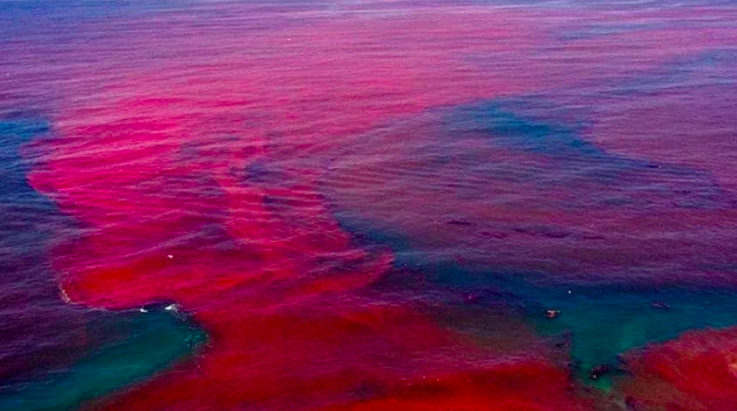

In [21]:
Image(filename='algaebloom.png')

This overgrowth of algae is known to be caused by an influx of extra nutrients from agricultural fertilizer runoff. In recent studies, a link to warming ocean temperature has also been established to contribute to the rising frequency of algae blooms (Nature). 

The two factors of temperature and nutrient influx can also be linked together in terms of algae blooms. As the surface layers of the ocean are warmed, it becomes more difficult for the colder water underneath to mix with this surface layer and therefore cycle nutrients into deeper parts of the ocean. Many harmful algae species grow in the surface layers of the ocean, so less distribution of nutrients through mixing allows them to grow in excess; therefore, mixing layer depth is a good proxy for nutrient availability across ocean surfaces.

We chose to focus on ocean temperature in particular because rising temperatures are a direct tangible impact of global climate change. Additionally, we began to look at nutrient cycling in relation to algae blooms through looking at the depth of mixing layers in the ocean; deeper mixing layers correspond to less nutrients available to harmful algae at the surface.

After attaining a large dataset holding plankton counts for a variety of potentially harmful species, we decided to focus on the Ceratium genus in order to do a more in-depth analysis of one genus rather than a surface-level review of a combination of species. This is a type of single-celled dinoflagellate algae, which means each individual is microscopic, has two arm-like flagella that help them move around, and is made up of only one cell as opposed to multiple such as other types of algae are (Britannica). Dinoflagellates in general, including Ceratium species, are known as key organisms in causing red tides. 


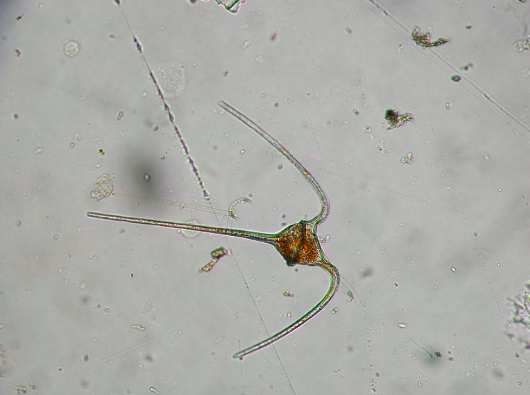

In [22]:
Image(filename='algae.png')

Due to the currently unpredictable nature of algae bloom timing and life cycles, many scientists have been collecting data on phytoplankton counts, chlorophyll concentration, and more from streams, lakes, and oceans in an attempt to find further definite patterns that may allow for prediction of blooms. Forecasting algae growth can inform safe seafood consumption by humans as well as provide insight to the overall health of aquatic ecosystems in the face of climate change. 

### Hypothesis
    
1. As ocean temperature increases, we expect to see an increase in Ceratium species counts; existing research suggests that higher ocean temperatures, along with higher ocean acidity and higher concentrations of nitrogen, contribute to better growing conditions for algae, which may cause them to bloom. 


2. As mixing layer depth increases, we expect to see a decrease in Ceratium species counts; existing research suggests that increased distribution of nutrients through mixing of ocean layers keeps algae growth in check, meaning that species counts will remain consistent or decrease. 

## Dataset Descriptions

### **Dataset Name:** Continuous plankton recorder data (CPR), SAHFOS

**Link to the dataset:** https://www.cprsurvey.org/data/our-data/ 

**Number of observations:** Initiated in 1931 and ended in 2004 with 207,619 samples counted for 437 phyto- and zooplankton taxa.

**Description:** Consists of data recorded by the Continuous Plankton Recorder, Sir Alistair Hardy Foundation for Ocean Science (SAHFOS). The CPR survey is the largest multi-decadal plankton monitoring programme in the world. It was initiated by Alister Hardy in 1931 and has evolved into a unique marine monitoring programme that provides a long-term measure of oceanic plankton populations in the North Sea and Northern Atlantic Ocean. Data is collected by dividing the ocean into areas based around continental shelf lines, and monthly samples over multiple years are taken in each area (a map of which can be seen below in the data cleaning section). 


### **Dataset Name:** Sea surface temperature (SST) time series

**Link to the dataset:** https://www.st.nmfs.noaa.gov/copepod/about/about-todd-obrien.html

**Number of observations:** 432

**Description:** This dataset is a time series of sea surface temperature in the North Atlantic ocean. It contains regular measured values in degrees Celcius for each month of each year for ~30 years. It is divided into the same CPR standard areas as the CPR dataset.


### **Dataset Name:** Mixed layer depth (MLD) time series

**Link to the dataset:** https://www.st.nmfs.noaa.gov/copepod/about/about-todd-obrien.html

**Number of observations:** 10932

**Description:** This dataset is a time series of about 30 years of satellite-based Mixed Layer Depth data. Entries are recorded in meters. It is also divided into the same CPR standard areas as the CPR dataset.

### **Combination of datasets:**
We combined our CPR and SST data as well as CPR and MLD data by creating various scatter plots and time series to visualise the relationship between temperature and phytoplankton species, looking for relationships between yearly average temperature of the variables and yearly standard deviation of the variables. This will help us determine if we will reject or fail to reject our hypothesis.

### Datasets Licenses   
We have signed a SAHFOS data license agreement allowing us to use the CPR data and we have received written consent to use both our CPR data and SST data from David Johns (head of the CPR Survey) and Todd O’Brien (NOAA Federal). Following this analysis, we will be deleting the CPR datasets, as our license for it expires at the end of the project (June 2019). 

## Setup

In [23]:
# adds yearly total and yearly std columns to the df
# call: df = add_yearly_details(df)

def add_yearly_details(df):
    
    if 'yearly total' in df:
        string = ' You have already added these columns, reload the df and run this again.'
        print(string)
        return None
    else:
        yearly_total = df.iloc[:,3:15].sum(axis = 1, skipna = True)
    
        # to add yearly range/standard deviation col
        yearly_std = df.iloc[:,3:15].std(axis = 1, skipna = True)
    
        yearly_details = pd.DataFrame({'yearly total':yearly_total, 'yearly std':yearly_std})
    
        df = df.join(yearly_details)
    
        return df

In [24]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

#Read in the data file
df = pd.read_csv('data.csv')
description = pd.read_csv('taxa names and numbers.csv')
monthly_samples = pd.read_csv('samples per month.csv')

# Need to do these 3 things every time SST csv is loaded for functions to work
SST_D4 = pd.read_csv('NOAA Data/cpr-d04__SST-satellite.csv')
SST_D4 = SST_D4.drop(columns = 'Unnamed: 2')
SST_D4.columns = ['date','temp']

# Need to do these 3 things every time MLD csv is loaded for functions to work
MLD_D4 = pd.read_csv('NOAA Data/cpr-d04__MLD-model.csv')
MLD_D4 = MLD_D4.drop(columns = 'Unnamed: 2')
MLD_D4.columns = ['date','mld']

# Need to do these 3 things every time SST csv is loaded for functions to work
SST_E5 = pd.read_csv('NOAA Data/cpr-e05__SST-satellite.csv')
SST_E5 = SST_E5.drop(columns = 'Unnamed: 2')
SST_E5.columns = ['date','temp']

# Need to do these 3 things every time MLD csv is loaded for functions to work
MLD_E5 = pd.read_csv('NOAA Data/cpr-e05__MLD-model.csv')
MLD_E5 = MLD_E5.drop(columns = 'Unnamed: 2')
MLD_E5.columns = ['date','mld']

#Rename columns for better clarity
df = df.rename(columns = {'Accepted_Id':'taxa','Area_Id':'area','Year':'year'})

df = add_yearly_details(df)

# Data Cleaning
## First Look

The CPR dataset has a considerable amount of missing data. In this specific context, missing values (NaNs) indicate that a usable sample was not collected and processed from that area. The map below shows the overall geographic area that data were collected from, with each letter/number combination (ex. B1) corresponding to a different sampling area.

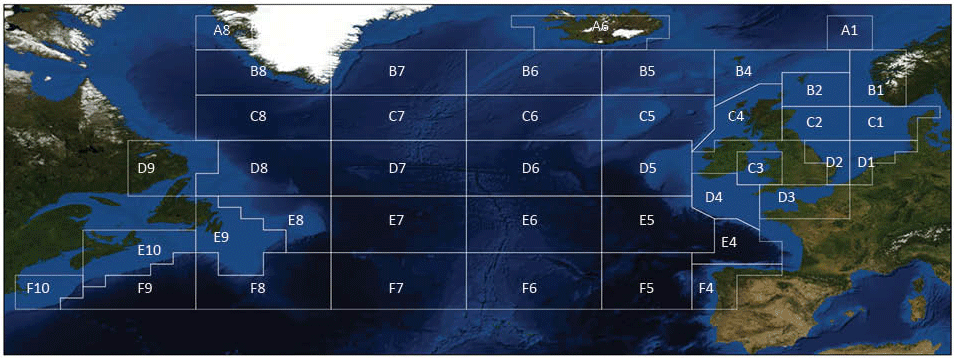

In [25]:
Image(filename='areas.png')

In [26]:
# The amount of missing values in each of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 17 columns):
area            12960 non-null object
year            12960 non-null int64
taxa            12960 non-null int64
1               8019 non-null float64
2               8352 non-null float64
3               8955 non-null float64
4               8721 non-null float64
5               8586 non-null float64
6               8685 non-null float64
7               8730 non-null float64
8               8757 non-null float64
9               8739 non-null float64
10              8640 non-null float64
11              8577 non-null float64
12              8316 non-null float64
yearly total    12960 non-null float64
yearly std      10926 non-null float64
dtypes: float64(14), int64(2), object(1)
memory usage: 1.7+ MB


The matrix of the missing values (below), shows data we have in black and the missing data in white. There are overall thicker bands of black than white, meaning we have more present than missing data. However, this dataset contains samples from multiple different years, areas, and species; therefore, this matrix is grounds for moving forward with this dataset, but we must take a closer look at the data. 

The Bar Graph (below) is also a handy visualization showing that the amount of missing data between the months is relatively similar. This, again, tells us the data is fairly consistent, but we need to further explore whether or not the present data is actually "good" data.

In [27]:
# This shows the occurence of missing data in the different columns
# Helpful in visualizing where the majority of missing data is contained.
msno.matrix(df)
plt.title('Matrix of the Missing Values', y=1.1, fontsize=40)
plt.ylabel('Rows', fontsize=20)
plt.xlabel('Columns', fontsize=20)

# This is just another simple visualization of the missingness of the data by column.
# Shows the comparsion across the months of nullity.
msno.bar(df)
plt.title('The Months of Missingness',y=1.1, fontsize=40)


NameError: name 'msno' is not defined

## Deeper Dive

The reason missing values may pose a problem in this analysis is that NaN values can cause inaccurate analyses of seasonal cycles and annual time series. Upon looking closer, we also found that many of the values in our datasets were values of zero. 

Wondering if these zeroes were also instances of missing samples, we reached out to a contact of ours from the Sir Alister Hardy Foundation for Ocean Science (SAHFOS) regarding the zeros and NaN values. We learned that the zeros are indeed real zeroes, meaning that samples were collected but no individuals of the species were found. The NaN values were confirmed to indicate the lack of a sample, meaning that there is no way of being completely sure what the species count is at that datapoint.

However, a paper written by the data-collecting researchers, "Using continuous plankton recorder data" (Richardson et al.), recommends that a "more robust annual estimate" can be obtained through first estimating plankton of the months were there is no data. The standard method used to estimate a missing monthly mean (Colebrook, 1975) is by interpolating according to the formula below     
        
>$ \bar{M} \times \frac{Y}{\bar{Y}}$
where $\bar{M}$ is the long-term mean of that month, $Y$ is the annual mean of the 
particular year, and $\bar{Y}$ is the long-term annual mean. 
        
We created a function _nanfiller_ to calculate this annual estimate by using the standard way to estimate a missing monthly mean (shown below).

## Data Cleaning Functions

In [28]:
def eightOutOfTwelve(df):
    listOfMonthsIntegers = ['1','2','3','4','5','6','7','6','9','10','11','12']
    #drops rows that have less than eight columns filled
    newDf = df.dropna(subset = listOfMonthsIntegers, thresh = 8) 
    
    return newDf

In [29]:
#NOTE: This resets the index of the df
def nanfiller(df):
    df = df.reset_index(drop=True) #prevents adding old index as column but can change if needed later
    Y_bar = (df.loc[:,'yearly total']/12).mean(skipna=1)
    
    
    for index,row in df.iterrows():
        for col,value in row['1':'12'].iteritems(): #only goes through the months
            if np.isnan(value) or value==0:
                int_col = int(col)
                #is definitely more efficient ways of doing this
                m_bar = df.iloc[:,int_col].mean(skipna=1) 
                #deprecated but works best using labels and integers
                Y = df.ix[index,'1':'12'].mean(skipna=1)
                replacement = m_bar * Y / Y_bar
                df.at[index, col] = replacement
                
        df = df.drop(['yearly total', 'yearly std'], axis=1)
        df = add_yearly_details(df)
                
    return df

In [30]:
def getAreas(df, setOfAreas):
    areas = df.area.isin(setOfAreas)
    newDf = df[areas]
    return newDf

## Picking Areas of Interest

According to the researchers, samples must have been collected from at least eight months in order to have a decent estimate to apply towards calculating annual abundance. Below, the dataframe 'year2000s' shows the amount of rows left after applying the 8/12 rule to just the years between 2000 and 2009– the results go from 2160 rows of data to 1611.

We decided to condense further and pick a small number of specific areas for analysis. We chose three coastal areas and three open ocean areas by selecting those with the highest number of usable data points. This will ideally give us the most interesting and useful data to work with and compare. We also chose areas that are relatively close to each other to maintain overall consistency in CPR device counts.

In [31]:
year2000s = df.loc[(df['year'].isin([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009]))]
print("Amount of rows before 8/12 rule: ", year2000s.shape[0])
year2000s = eightOutOfTwelve(year2000s) #drops rows that have less than eight columns filled
print("Amount of rows after 8/12 rule: ", year2000s.shape[0])

Amount of rows before 8/12 rule:  2160
Amount of rows after 8/12 rule:  1611


In [32]:
print(df.area.value_counts().to_string())

D5     540
B1     540
E5     540
E7     540
F9     540
C3     540
E10    540
B2     540
C2     540
C5     540
D8     540
D4     540
E4     540
D6     540
D9     540
C4     540
F10    540
D7     540
E9     540
E6     540
E8     540
D3     540
F4     540
C1     540


In [33]:
coastalArea = {'C1','C2','D4'}
deepOceanArea = {'D7','E6','E5'}
coastalData = getAreas(df, coastalArea)
deepOceanData = getAreas(df, deepOceanArea)
coastalData = eightOutOfTwelve(coastalData)
deepOceanData = eightOutOfTwelve(deepOceanData)
coastalData = nanfiller(coastalData)
deepOceanData = nanfiller(deepOceanData)
print(coastalData.area.value_counts().to_string())
print("\n")
print(deepOceanData.area.value_counts().to_string())

D4    540
C1    540
C2    540


E5    378
D7    351
E6    207


In [34]:
# create df for each taxa for coastal
cer_fusus_coastal = coastalData[coastalData['taxa'] == 121]
cer_furca_coastal = coastalData[coastalData['taxa'] == 122]
cer_lineatum_coastal = coastalData[coastalData['taxa'] == 123]
cer_tripos_coastal = coastalData[coastalData['taxa'] == 124]

print(cer_fusus_coastal)

# create df for each taxa for deep ocean
cer_fusus_deep_ocean = deepOceanData[deepOceanData['taxa'] == 121]
cer_furca_deep_ocean = deepOceanData[deepOceanData['taxa'] == 122]
cer_lineatum_deep_ocean = deepOceanData[deepOceanData['taxa'] == 123]
cer_tripos_deep_ocean = deepOceanData[deepOceanData['taxa'] == 124]

    area  year  taxa         1  ...        11       12  yearly total  \
0     C1  1958   121   5454.55  ...  83000.00  7500.00     258684.30   
1     C1  1959   121  16052.63  ...   9210.53   882.35     122222.25   
2     C1  1960   121   1500.00  ...  13378.38  3250.00      60485.52   
..   ...   ...   ...       ...  ...       ...      ...           ...   
177   D4  2015   121   2732.55  ...   1578.95  8972.29      91126.50   
178   D4  2016   121    755.79  ...   3832.65  2499.43      25385.27   
179   D4  2017   121    777.58  ...   3806.49  2482.37      25212.04   

     yearly std  
0      28020.11  
1       7557.44  
2       4317.12  
..          ...  
177     6677.48  
178     1972.47  
179     1744.12  

[180 rows x 17 columns]


## Data Analysis and Results
### Data Analysis Functions
_Functions used repeatedly throughout the data analysis section, this is quite long so scroll down_
1. **yearly_std_df:** create df of year and SST/MLD standard deviation
2. **yearly_avg_df:** create df of year and yearly average SST/MLD
3. **plot_yearly_choice:** plot time series of (1),(2) or (3) for SST/MLD


4. **certemp_plotavg:** plots all ceratium species and SST/MLD time series on one plot
5. **certemp_plotstd:** plots all ceratium species and SST/MLD standard deviation on one plot
6. **scatter_avg:** scatter plot of average SST/MLD vs plankton count and displays correlation coefficient
7. **scatter_std:** scatter plot of SST/MLD std vs plankton std and displays correlation coefficient


8. **all_cervarTotal & scatter_total:** creates df then scatter plot and correlation coeff. for total ceratium species counts for a given area vs average SST/MLD
10. **linear_model:** does regression of yearly plankton count total vs. yearly average SST/MLD

In [35]:
# 1. creates df of year and SST/MLD standard deviation for a CPR standard area
# works for SST and MLD dataframes
# NB: SST_B1.columns = ['date','temp']
# variable_str = {"temp","mld"}
# call: yearly_stdB1 = yearly_std_df(SST_B1, variable_str)
def yearly_std_df(SST_df,variable_str):
    for index,row in SST_df.iterrows():
        SST_df.loc[index,'date'] = str(row['date'][:4])
    
    yearly_std_dict = {}
    years = np.arange(1982,2016,1)
    for year in years:
        year_str = str(year)
        if year_str in SST_df.loc[:,'date'].unique():
            yearly_std_dict[year_str] = (SST_df[SST_df.loc[:,'date']==
                                        year_str].loc[:,variable_str].std(axis=0,skipna=True))
    
    std_df = pd.DataFrame.from_dict(yearly_std_dict, orient = "index")
    std_df.columns = ['yearly std']
    std_df.index.name = 'years'

    std_df['year'] = std_df.index
    std_df['year'] = std_df['year'].astype(int)
    
    return std_df[std_df['year']>= 1958]

In [36]:
# 2. creates df of year and average SST/MLD for a CPR standard area
# works for MLD and SST dataframes
# call: yearly_avgB1 = yearly_avg_df(SST_B1)
def yearly_avg_df(df):
    
    yearly_var_dict = {}
    for index, row in df.iterrows():
        date = row['date']
        year = str(date)[:4]
        var = row.iloc[1]
        if str(year) in yearly_var_dict:
            yearly_var_dict[str(year)] += var
        else:
            yearly_var_dict[str(year)] = var
        
    average_dict= {}
    for year, var in yearly_var_dict.items():
        average_dict[year]= var/12
            
    average_df = pd.DataFrame.from_dict(average_dict, orient = "index")
    average_df.columns = ['yearly avg']
    average_df.index.name = 'years'
    
    average_df['year'] = average_df.index
    average_df['year'] = average_df['year'].astype(int)
    average_df = average_df[average_df['year']>= 1958]

    return average_df

In [37]:
# 3. Plots average/std time series for SST/MLD depending on string entered
# call: plot_yearly_choice(yearly_avgtempB1, 'yearly avg', 'mediumvioletred')
# call: plot_yearly_choice(yearly_stdB1, 'yearly std', 'mediumvioletred')
def plot_yearly_choice(df, choice_str, colour_str):
    
    # Some Python versions plot this unordered so this is a fix for it
    order = np.argsort(df.loc[:,'year'])
    xs = np.array(df.loc[:,'year'])[order]
    ys = np.array(df.loc[:,choice_str])[order]
    
    #This plots it and makes the plot pretty  
    fig, ax = plt.subplots(figsize= (10, 5))
    fig1 = plt.plot(xs, ys, colour_str)
    fig.autofmt_xdate(rotation= 60)
    
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(False)
    
    plt.ylabel(choice_str)
        
    return fig1

In [38]:
# 4. plots total yearly plankton count and yearly average SST/MLD time series
# certemp_plot('B1',yearly_avgtempB1,cer_fusus,cer_furca,cer_lineatum,cer_tripos)
def certemp_plotavg(area_str, yearly_variable, cer_fusus,cer_furca,cer_lineatum,cer_tripos):
    
    cer_fusus = nanfiller(cer_fusus[cer_fusus.loc[:,'area']==area_str])
    cer_furca = nanfiller(cer_furca[cer_furca.loc[:,'area']==area_str])
    cer_tripos = nanfiller(cer_tripos[cer_tripos.loc[:,'area']==area_str])
    cer_lineatum = nanfiller(cer_lineatum[cer_lineatum.loc[:,'area']==area_str])
    
    cer_fusus = cer_fusus[cer_fusus.loc[:,'year']>=1982]
    cer_furca = cer_furca[cer_furca.loc[:,'year']>=1982]
    cer_tripos = cer_tripos[cer_tripos.loc[:,'year']>=1982]
    cer_lineatum = cer_lineatum[cer_lineatum.loc[:,'year']>=1982]
    
    to_graph = cer_fusus.join(yearly_variable.set_index('year'), on='year', how = 'inner')
    to_graph = to_graph.drop(['area','taxa','1','2','3','4','5','6','7','8','9','10','11',
                              '12','yearly std'],axis=1)
    to_graph2 = cer_furca.join(yearly_variable.set_index('year'), on='year', how = 'inner')
    to_graph2 = to_graph2.drop(['area','taxa','1','2','3','4','5','6','7','8','9','10','11',
                                '12','yearly std'],axis=1)
    to_graph3 = cer_lineatum.join(yearly_variable.set_index('year'), on = 'year', how = 'inner')
    to_graph3 = to_graph3.drop(['area','taxa','1','2','3','4','5','6','7','8','9','10','11',
                                '12','yearly std'],axis=1)
    to_graph4 = cer_tripos.join(yearly_variable.set_index('year'), on = 'year', how = 'inner')
    to_graph4 = to_graph4.drop(['area','taxa','1','2','3','4','5','6','7','8','9','10','11',
                                '12','yearly std'],axis=1)
    
    sns.set()

    fig = plt.figure(figsize=(16,5))
    ax1 = fig.add_subplot(111)
    ax1.plot(to_graph.loc[:,'year'],to_graph.loc[:,"yearly avg"], 'k', linestyle = 'dashed', label = 'Average')
    ax1.set_ylabel("yearly avg",color='k')
    ax1.legend(loc = 'upper right')


    ax2 = ax1.twinx()
    ax2.plot(to_graph.loc[:,'year'], to_graph.loc[:,'yearly total'], 'deeppink', 
             label = 'Cer Fusus')
    ax2.plot(to_graph2.loc[:,'year'], to_graph2.loc[:,'yearly total'], 'steelblue', 
             label = 'Cer Furca')
    ax2.plot(to_graph3.loc[:,'year'], to_graph3.loc[:,'yearly total'], 'orange',
             label = 'Cer Lineatum')
    ax2.plot(to_graph4.loc[:,'year'], to_graph4.loc[:,'yearly total'], 'mediumseagreen', label
             = 'Cer Tripos')
    ax2.set_ylabel('Plankton Count', color='k')
    ax2.legend(loc = 'upper left')
    for tl in ax2.get_yticklabels():
            tl.set_color('k')
    
    for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
        
    return None

In [39]:
# 5. Plots time series of standard deviations of ceraniums and MLD/SST datasets
# certemp_plotstd('B1',yearly_sst_stdB1,cer_fusus,cer_furca,cer_lineatum,cer_tripos)
# certemp_plotstd('B1',yearly_mld_stdB1,cer_fusus,cer_furca,cer_lineatum,cer_tripos)

def certemp_plotstd(area_str, yearly_std, cer_fusus,cer_furca,cer_lineatum,cer_tripos):
    
    cer_fusus = nanfiller(cer_fusus[cer_fusus.loc[:,'area']==area_str])
    cer_furca = nanfiller(cer_furca[cer_furca.loc[:,'area']==area_str])
    cer_tripos = nanfiller(cer_tripos[cer_tripos.loc[:,'area']==area_str])
    cer_lineatum = nanfiller(cer_lineatum[cer_lineatum.loc[:,'area']==area_str])
    
    cer_fusus = cer_fusus[cer_fusus.loc[:,'year']>=1982]
    cer_furca = cer_furca[cer_furca.loc[:,'year']>=1982]
    cer_tripos = cer_tripos[cer_tripos.loc[:,'year']>=1982]
    cer_lineatum = cer_lineatum[cer_lineatum.loc[:,'year']>=1982]
    
    to_graph = cer_fusus.join(yearly_std.set_index('year'), on='year', how = 'inner',
                              lsuffix=" cer")
    to_graph = to_graph.drop(['area','taxa','1','2','3','4','5','6','7','8','9','10','11',
                              '12','yearly total'],axis=1)
    to_graph2 = cer_furca.join(yearly_std.set_index('year'), on='year', how = 'inner',
                               lsuffix=" cer")
    to_graph2 = to_graph2.drop(['area','taxa','1','2','3','4','5','6','7','8','9','10','11',
                                '12','yearly total'],axis=1)
    to_graph3 = cer_lineatum.join(yearly_std.set_index('year'), on = 'year', how = 'inner',
                                  lsuffix=" cer")
    to_graph3 = to_graph3.drop(['area','taxa','1','2','3','4','5','6','7','8','9','10','11',
                                '12','yearly total'],axis=1)
    to_graph4 = cer_tripos.join(yearly_std.set_index('year'), on = 'year', how = 'inner',
                                lsuffix=" cer")
    to_graph4 = to_graph4.drop(['area','taxa','1','2','3','4','5','6','7','8','9','10','11',
                                '12','yearly total'],axis=1)
    
    sns.set()
    # Some Python versions plot this unordered so this is a fix for it
    order = np.argsort(to_graph.loc[:,'year'])
    xs = np.array(to_graph.loc[:,'year'])[order]
    x2s = np.array(to_graph2.loc[:,'year'])[order]
    x3s = np.array(to_graph3.loc[:,'year'])[order]
    x4s = np.array(to_graph.loc[:,'year'])[order]
    to_graphs = np.array(to_graph.loc[:,'yearly std'])[order]
    to_graph1s = np.array(to_graph.loc[:,'yearly std cer'])[order]
    to_graph2s = np.array(to_graph2.loc[:,'yearly std cer'])[order]
    to_graph3s = np.array(to_graph3.loc[:,'yearly std cer'])[order]
    to_graph4s = np.array(to_graph4.loc[:,'yearly std cer'])[order]
    
    
    fig = plt.figure(figsize=(16,5))
    ax1 = fig.add_subplot(111)
    ax1.plot(xs,to_graphs, 'k', linestyle = 'dashed')
    ax1.set_ylabel('std',color='k')


    ax2 = ax1.twinx()
    ax2.plot(xs, to_graph1s, 'deeppink', label = 'Cer Fusus')
    ax2.plot(x2s, to_graph2s, 'steelblue', label = 'Cer Furca')
    ax2.plot(x3s, to_graph3s, 'orange', label = 'Cer Lineatum')
    ax2.plot(x4s, to_graph4s, 'mediumseagreen', label = 'Cer Tripos')
    ax2.set_ylabel('Plankton Count', color='k')
    ax2.legend()
    for tl in ax2.get_yticklabels():
            tl.set_color('k')
    
    for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
        
    return None

In [40]:
# 6. Plots correlation between average plankton count and average SST/MLD
# call: scatter_avg(cer_fusus,'cer fusus', yearly_sst_avgB1, 'B1', 'teal')
# call: scatter_avg(cer_fusus,'cer fusus', yearly_mld_avgB1, 'B1', 'teal')

def scatter_avg(species_df,species_str,area_avg_df,area_str,colour_str):
    species_df_area = nanfiller(species_df[species_df.loc[:,'area']==area_str])
    
    to_graph = species_df_area.join(area_avg_df.set_index('year'), on='year', how = 'inner')
    to_graph = to_graph.drop(['area','taxa','1','2','3','4','5','6','7','8','9','10','11','12']
                             ,axis=1)
    
    fig = to_graph.plot.scatter('yearly avg', 'yearly total', color = colour_str, 
                                figsize = (8,4), label = species_str)
    sns.regplot(x='yearly avg', y='yearly total', data=to_graph, color = colour_str)
    plt.gca().legend()
    
    totalTemp_corr = to_graph.corr(method='pearson').loc['yearly avg','yearly total']
    print(species_str,' correlation coeff: ' + str(totalTemp_corr))
  
    return fig

In [41]:
# 7. call: scatter_std(cer_fusus,'cer fusus', yearly_sst_stdB1, 'B1', 'teal')
def scatter_std(species_df,species_str,area_std_df,area_str,colour_str):
    species_df_area = nanfiller(species_df[species_df.loc[:,'area']==area_str])
    
    to_graph = species_df_area.join(area_std_df.set_index('year'), on='year', how = 'inner',
                                    lsuffix=' cer')
    to_graph = to_graph.drop(['area','taxa','1','2','3','4','5','6','7','8','9','10','11','12']
                             ,axis=1)
    
    fig = to_graph.plot.scatter('yearly std', 'yearly std cer', color = colour_str, 
                                figsize = (8,4))
    sns.regplot(x='yearly std', y='yearly std cer', data=to_graph, color = colour_str)
    
    total_corr = to_graph.corr(method='pearson').loc['yearly std','yearly std cer']
    print(species_str,' correlation coeff: ' + str(total_corr))

    return fig

In [42]:
# 8. creates df for total ceratium species counts for a given area
# call: all_cervarTotal('B1',cer_fusus,cer_furca,cer_lineatum,cer_tripos):
def all_cervarTotal(area_str,cer_fusus,cer_furca,cer_lineatum,cer_tripos):
    
    cer_fusus = nanfiller(cer_fusus[cer_fusus.loc[:,'area']==area_str])
    cer_furca = nanfiller(cer_furca[cer_furca.loc[:,'area']==area_str])
    cer_tripos = nanfiller(cer_tripos[cer_tripos.loc[:,'area']==area_str])
    cer_lineatum = nanfiller(cer_lineatum[cer_lineatum.loc[:,'area']==area_str])
    
    #eliminates all columns except year and yearly total, for merging
    cer_fusus_yearandtotal = cer_fusus.drop(columns = ['area','taxa','1','2','3','4','5','6',
                                                    '7','8','9','10','11','12','yearly std'])
    cer_furca_yearandtotal =  cer_furca.drop(columns = ['area','taxa','1','2','3','4','5','6',
                                                    '7','8','9','10','11','12','yearly std'])
    cer_lineatum_yearandtotal = cer_lineatum.drop(columns = ['area','taxa','1','2','3','4','5',
                                                '6','7','8','9','10','11','12','yearly std'])
    cer_tripos_yearandtotal = cer_tripos.drop(columns = ['area','taxa','1','2','3','4','5','6'
                                                    ,'7','8','9','10','11','12','yearly std'])
    
    #totals the values of all cer species
    cer2 = cer_fusus_yearandtotal.merge(cer_furca_yearandtotal.set_index('year'), on='year')
    cer3 = cer2.merge(cer_lineatum_yearandtotal.set_index('year'), on = 'year')
    cer4 = cer3.merge(cer_tripos_yearandtotal.set_index('year'), on = 'year')
    cer4.index = cer4['year']
    cer4 = cer4.drop(columns = 'year')
    total_cervalues = cer4.sum(axis = 1, skipna = True) 
    total_cervalues = total_cervalues.to_frame() 
    total_cervalues.columns = ['yearly total']
    
    
    return total_cervalues

# plots vs. average temperature for given area
# total_cerB1_values = all_cervarTotal('B1',cer_fusus,cer_furca,cer_lineatum,cer_tripos)
# scatter_temp('B1', total_cerB1_values, yearly_avgtempB1, 'slateblue')
def scatter_temp(area_str, totalTemp_df, yearly_avg_df, colour_str):
    
    to_graph = totalTemp_df.join(yearly_avg_df.set_index('year'), on='year', how = 'inner')

    to_graph.plot.scatter('yearly avg', 'yearly total', color = colour_str, figsize = (16,8))
    sns.regplot(x='yearly avg', y='yearly total', data=to_graph, color = colour_str)
    print('correlation: ', str(to_graph.corr(method='pearson').loc['yearly avg',
                                                                   'yearly total']) )
    
    return None

In [43]:
# 9. does regression of yearly plankton count total vs. yearly average temperature
# call: linear_model(cer_fusus, 'B1', yearly_avgtempB1)
def linear_model(species_df, area_str, yearly_avgtemp):   
    species_df = species_df[species_df.loc[:,'area']==area_str]
    to_model = species_df.join(yearly_avgtemp.set_index('year'), on = 'year', how = 'inner')
    to_model = to_model.drop(['area','taxa','1','2','3','4','5','6','7','8','9','10','11','12']
                             ,axis=1)
    
    ## X means our input variables (or independent variables)
    X = to_model['yearly avg'] 
    y = to_model['yearly total'] ## Y usually means our output/dependent variable
    X = sm.add_constant(X) ## add intercepts
    
    model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
    predictions = model.predict(X)
    return model.summary()

## Our Analysis
We chose to split up our analysis between Coastal and Deep Ocean Regions. Within those sets, we chose D4 and E5 to illustrate our analyses as these had the most data points for our analysis. Visuals and results from the other areas we chose (C1 & C2 for coastal, D7 & E6 for deep ocean) can be found in the Supplemental Folder, found here: <br>

**Areas C1 & D7: http://bit.ly/areasC1-D7** <br>
**Areas C2 & E6: http://bit.ly/areasC2-E6** <br>

The plots below explore relationships between a number of variables, we plot scatter plots of yearly average sea surface temperature(SST) vs. total population counts for each ceratium species to see if there is a relationship between the average SST and the total population of the phytoplankton. We also plot SST standard deviation against ceratium populations yearly standard deviation to see if more variability in temperature implies more variablity in the population i.e. population blooms. We repeat this for a combined dataframe of all the ceratium species for the area. The line in the scatter plots represents the linear regression line of best fit created by bootstrap with the seaborn package and the translucent band represents a 95% confidence interval.

We repeat some of these visualizations for the mixed layer depth (MLD) time series. MLD would be indicative of the concentration of nutrients available to plankton on the sea surface at the time and we expect it to show a negative relationship with populations because the deeper the MLD the less nutrients will be concentrated at the surface.

Finally, we include an OLS regression summary for the SST time series vs. each ceratium species and we will look at the p-values to analyse whether our data yields any statistically significant results allowing us to conclude that there is some relationship between SST average/standard deviations and plankton populations totals/standard deviations.

The heatmap below is a visual representation of areas with the overall highest plankton counts over all the years together. 

In [44]:
#read count data
hm = pd.read_csv('data.csv')
yearly_total = hm.iloc[:,3:15].sum(axis = 1)
yearly_total = pd.DataFrame({'yearly total':yearly_total})
hm = hm.join(yearly_total)

#Rename columns for better clarity
hm = hm.rename(columns = {'Accepted_Id':'taxa','Area_Id':'area','Year':'year'})

#read coordinates data
coords = pd.read_csv('coords.csv')
coords.rename(columns={'AREA_ID':'area'}, inplace=True)
coords.LONGITUDE = coords.LONGITUDE.astype(int)
coords.LATITUDE = coords.LATITUDE.astype(int)

#align coordinates and count data
toMap = coords.join(hm.set_index('area'), on='area', how = 'inner')
toMap = toMap.drop(columns=['1','2','3','4','5','6','7','8','9','10','11','12','POINT_NUMBER'])
toMap = toMap.reset_index()
toMap = toMap.drop(columns=['index'])

#isolate counts of species of interest by area
toMap = toMap[toMap['taxa'] <= 124]
toMap = toMap.drop(columns=['year', 'taxa', 'area'])
toMap_grouped = toMap.groupby(['LONGITUDE', 'LATITUDE']).sum()
toMap_done = toMap_grouped.reset_index()

##HEATMAP SETUP
speciesmap = folium.Map([40, -55], zoom_start=3)
algaeGroup = folium.FeatureGroup(name="Ceratium")
populationGroup = folium.FeatureGroup(name="Population Overlay")

# convert to (n, 2) nd-array format for heatmap
plot = toMap_done[['LATITUDE', 'LONGITUDE']].as_matrix()

# plot 1962 heatmap
speciesmap.add_children(plugins.HeatMap(plot, radius=17))

speciesmap

NameError: name 'folium' is not defined

## Coastal Region Analysis  (Area D4)
The colors for these time series below were chosen due to their distinguishability for both colorblind and non-colorblind individuals.

In [ ]:
# SST Time Series

yearly_sst_avgD4 = yearly_avg_df(SST_D4)
plot_yearly_choice(yearly_sst_avgD4,'yearly avg','r')
plt.title('Average SST of D4 Over Time')
plt.ylabel('Average Temperature (ºC)')

yearly_sst_stdD4=yearly_std_df(SST_D4,"temp")
plot_yearly_choice(yearly_sst_stdD4,'yearly std','teal')
plt.title('Standard Deviation of SST in D4 Over Time')
plt.ylabel('STD (ºC)')

**ABOVE:** Time Series of yearly  average SST (Sea Surface Temperature) and yearly standard deviation SST in degrees celcius. While standard deviation is relatively random, we can see an overall trend of SST rising. This is condusive with our understanding of climate change. 

In [ ]:
# MLD Time Series

yearly_mld_avgD4 = yearly_avg_df(MLD_D4)
plot_yearly_choice(yearly_mld_avgD4,'yearly avg','r')
plt.title('Average MLD in D4 Over Time')
plt.ylabel('Average Depth (m)')
plt.xlabel('Years')

yearly_mld_stdD4=yearly_std_df(MLD_D4,"mld")
plot_yearly_choice(yearly_mld_stdD4,'yearly std','teal')
plt.title('Standard Deviation in MLD in D4 Over Time')
plt.ylabel('STD (m)')
plt.xlabel('Years')

**ABOVE:** Time series of yearly average MLD (Mixed Layer Depth) and yearly MLD standard deviation. There is not a clear trend in either of these visualizations.

Text(0,0.5,'Plankton Count')

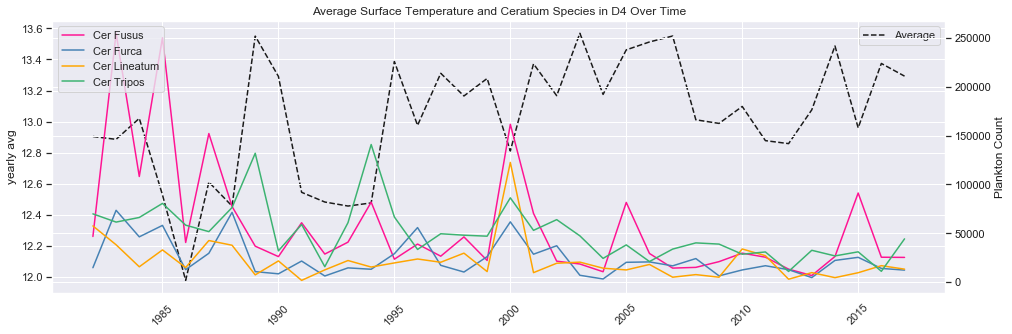

In [28]:
certemp_plotavg('D4',yearly_sst_avgD4,cer_fusus_coastal,cer_furca_coastal,
                cer_lineatum_coastal,cer_tripos_coastal)
plt.title('Average Surface Temperature and Ceratium Species in D4 Over Time')
plt.ylabel('Plankton Count')

**ABOVE:** Time series of average SST and total yearly population counts for each ceratium species. Plotted to determine if obvious trend correlations exist. Some spikes appear as if they are related while others do not, but there is no clear pattern. Some of these spikes would be worth investigating if given more time.

Text(0.5,0,'Years')

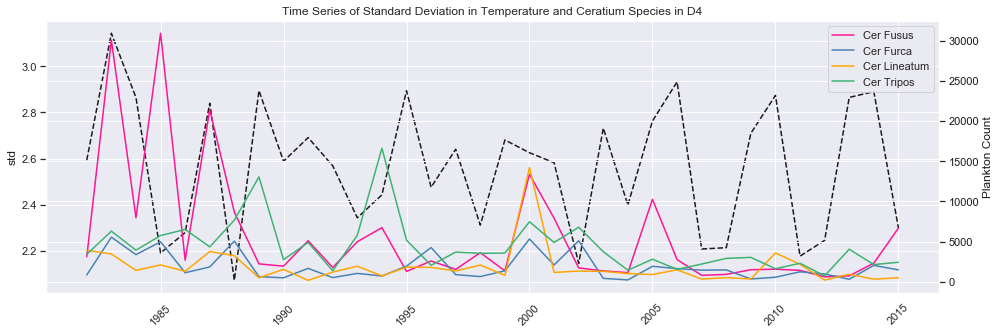

In [29]:
certemp_plotstd('D4',yearly_sst_stdD4,cer_fusus_coastal,cer_furca_coastal,cer_lineatum_coastal,cer_tripos_coastal)
plt.title('Time Series of Standard Deviation in Temperature and Ceratium Species in D4')
plt.xlabel('Years')

**ABOVE:** Time series of yearly standard deviation of SST and yearly standard deviation of each ceratium species. Plotted to determine if any obvious trend correlation exists. We chose to plot standard deviation to determine if years with more profound shifts in temperature exhibited different behavior than could be explained by average temperature alone. These relationships appear more promising.

Text(0.5,1,'Average MLD and Plankton Count in D4 Over Time')

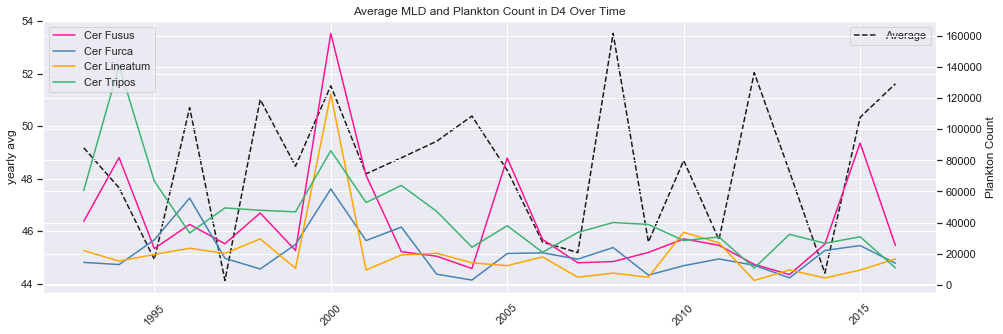

In [30]:
certemp_plotavg('D4',yearly_mld_avgD4,cer_fusus_coastal,cer_furca_coastal,
                cer_lineatum_coastal,cer_tripos_coastal)
plt.title('Average MLD and Plankton Count in D4 Over Time')

**ABOVE:** Time series of average MLD and total yearly population counts for each certaium species. These spikes seem far more related than the SST vs. count time series. Some notable dates such as 2000 and 2015 may be worth investigating in depth in the future. 

Text(0.5,1,'Time Series of Standard Deviation in Temperature and Ceratium Species in D4')

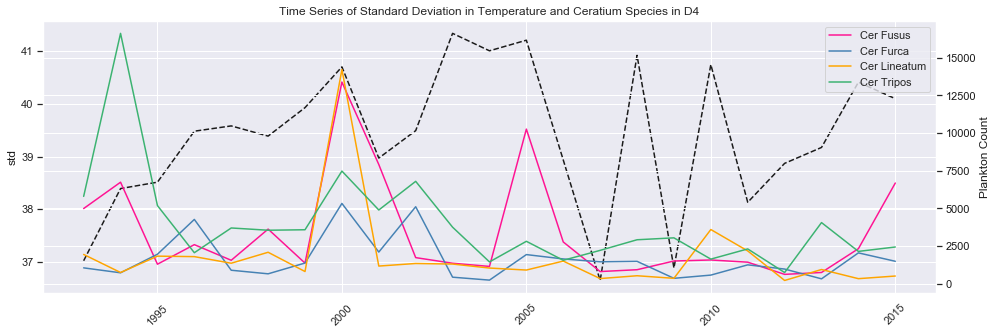

In [31]:
certemp_plotstd('D4',yearly_mld_stdD4,cer_fusus_coastal,cer_furca_coastal,cer_lineatum_coastal,cer_tripos_coastal)
plt.title('Time Series of Standard Deviation in Temperature and Ceratium Species in D4')

**ABOVE:** Time series of yearly standard deviation of MLD (Mixed Layer Depth) and yearly standard deviation of each ceratium species.  

#### Scatterplots

cer fusus coastal  correlation coeff: -0.3610844930372537
cer furca coastal  correlation coeff: -0.24090923144732926
cer lineatum coastal  correlation coeff: -0.22560022719000258
cer tripos coastal  correlation coeff: -0.24746957304128508


Text(0,0.5,'Cer. Tripos Counts')

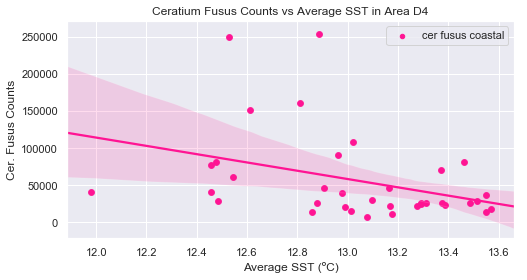

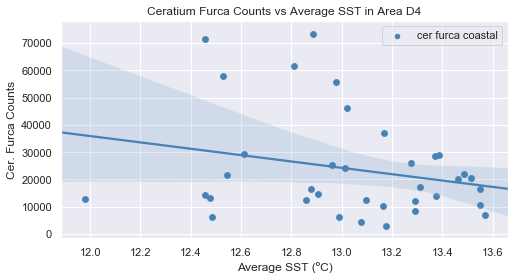

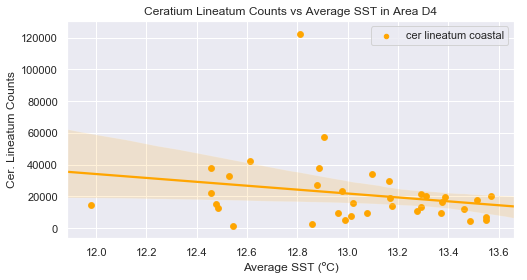

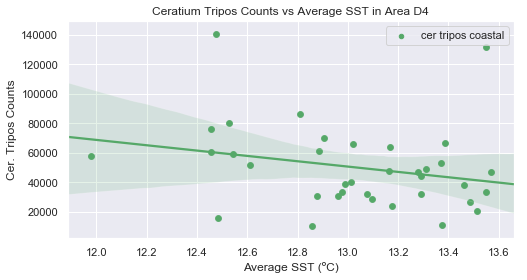

In [32]:
# Plot yearly avg. SST vs. yearly ceratium species total
scatter_avg(cer_fusus_coastal,'cer fusus coastal', yearly_sst_avgD4, 'D4', 'deeppink')
plt.title('Ceratium Fusus Counts vs Average SST in Area D4')
plt.xlabel('Average SST (ºC)')
plt.ylabel('Cer. Fusus Counts')

scatter_avg(cer_furca_coastal,'cer furca coastal',yearly_sst_avgD4,'D4','steelblue' )
plt.title('Ceratium Furca Counts vs Average SST in Area D4')
plt.xlabel('Average SST (ºC)')
plt.ylabel('Cer. Furca Counts')

scatter_avg(cer_lineatum_coastal,'cer lineatum coastal',yearly_sst_avgD4,'D4','orange' )
plt.title('Ceratium Lineatum Counts vs Average SST in Area D4')
plt.xlabel('Average SST (ºC)')
plt.ylabel('Cer. Lineatum Counts')


scatter_avg(cer_tripos_coastal,'cer tripos coastal',yearly_sst_avgD4,'D4','g' )
plt.title('Ceratium Tripos Counts vs Average SST in Area D4')
plt.xlabel('Average SST (ºC)')
plt.ylabel('Cer. Tripos Counts')

**ABOVE:** Scatterplots with regression line and 95% confidence interval of yearly average SST vs. yearly total population of ceratium species. This suggests a negative relationship between total population with temperature. 

cer fusus coastal  correlation coeff: 0.14294590220266457
cer furca coastal  correlation coeff: -0.09369860091968255
cer lineatum coastal  correlation coeff: 0.08741311297869785
cer tripos coastal  correlation coeff: -0.0024227148791859886


Text(0,0.5,'Cer. Tripos STD')

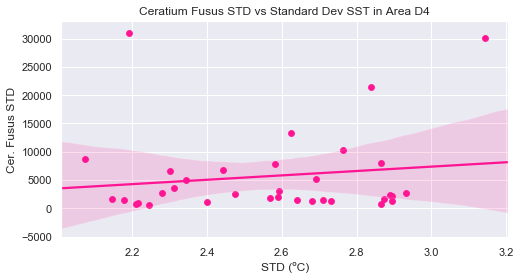

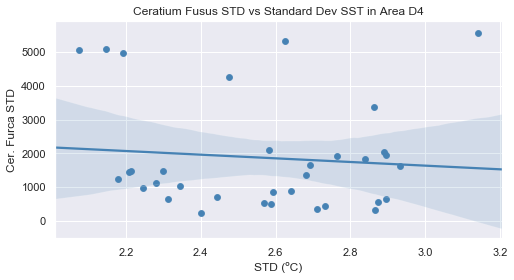

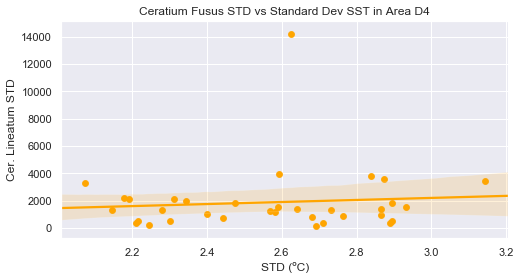

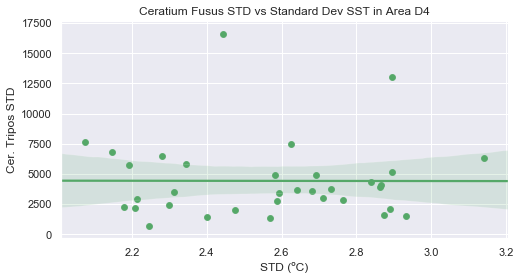

In [33]:
# Plot yearly std. SST vs. yearly ceratium species std
scatter_std(cer_fusus_coastal,'cer fusus coastal', yearly_sst_stdD4, 'D4', 'deeppink')
plt.title('Ceratium Fusus STD vs Standard Dev SST in Area D4')
plt.xlabel('STD (ºC)')
plt.ylabel('Cer. Fusus STD')
scatter_std(cer_furca_coastal,'cer furca coastal',yearly_sst_stdD4,'D4','steelblue' )
plt.title('Ceratium Fusus STD vs Standard Dev SST in Area D4')
plt.xlabel('STD (ºC)')
plt.ylabel('Cer. Furca STD')
scatter_std(cer_lineatum_coastal,'cer lineatum coastal',yearly_sst_stdD4,'D4','orange' )
plt.title('Ceratium Fusus STD vs Standard Dev SST in Area D4')
plt.xlabel('STD (ºC)')
plt.ylabel('Cer. Lineatum STD')
scatter_std(cer_tripos_coastal,'cer tripos coastal',yearly_sst_stdD4,'D4','g' )
plt.title('Ceratium Fusus STD vs Standard Dev SST in Area D4')
plt.xlabel('STD (ºC)')
plt.ylabel('Cer. Tripos STD')

**ABOVE:** Scatterplots with regression line and 95% confidence interval of yearly SST standard deviation vs. yearly population standard deviation of ceratium species. 

cer fusus coastal  correlation coeff: 0.21946867930703265
cer furca coastal  correlation coeff: 0.18149457930230037
cer lineatum coastal  correlation coeff: 0.23818331080528934
cer tripos coastal  correlation coeff: -0.07910602657264951


Text(0,0.5,'Cer. Tripos Counts')

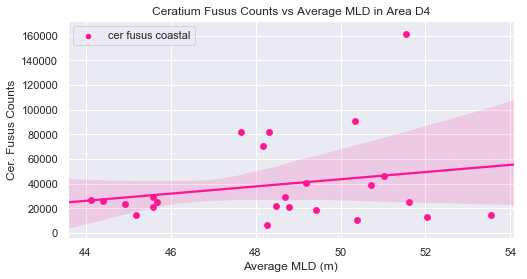

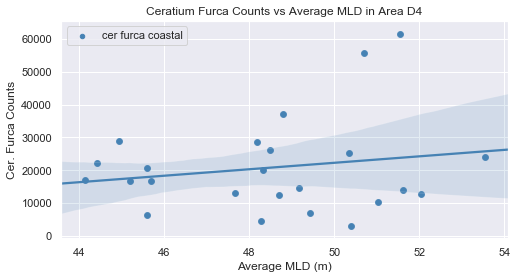

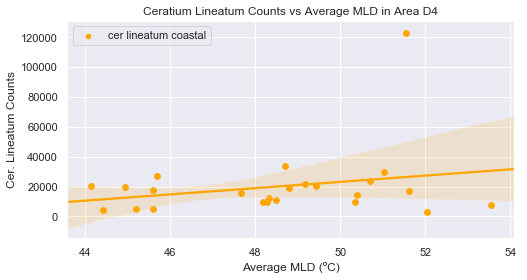

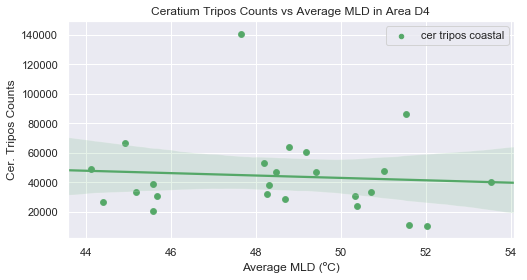

In [34]:
# Plot yearly avg. MLD vs. yearly total ceratium species count
scatter_avg(cer_fusus_coastal,'cer fusus coastal',yearly_mld_avgD4,'D4','deeppink' )
plt.title('Ceratium Fusus Counts vs Average MLD in Area D4')
plt.xlabel('Average MLD (m)')
plt.ylabel('Cer. Fusus Counts')

scatter_avg(cer_furca_coastal,'cer furca coastal',yearly_mld_avgD4,'D4','steelblue' )
plt.title('Ceratium Furca Counts vs Average MLD in Area D4')
plt.xlabel('Average MLD (m)')
plt.ylabel('Cer. Furca Counts')

scatter_avg(cer_lineatum_coastal,'cer lineatum coastal',yearly_mld_avgD4,'D4','orange' )
plt.title('Ceratium Lineatum Counts vs Average MLD in Area D4')
plt.xlabel('Average MLD (ºC)')
plt.ylabel('Cer. Lineatum Counts')

scatter_avg(cer_tripos_coastal,'cer tripos coastal',yearly_mld_avgD4,'D4','g' )
plt.title('Ceratium Tripos Counts vs Average MLD in Area D4')
plt.xlabel('Average MLD (ºC)')
plt.ylabel('Cer. Tripos Counts')

**ABOVE:** Scatterplot with regression line and 95% confidence interval of yearly average MLD vs. yearly total population of ceratium species. The correlation coefficient are small and there are no consistent patterns, therefore these graphs cannot suggest any particular relationship between the variables.  

#### Scatterplots of all species combined for SST

correlation:  -0.3724056494222851


Text(0.5,1,'Total Ceratium Counts vs. Average SST in D4')

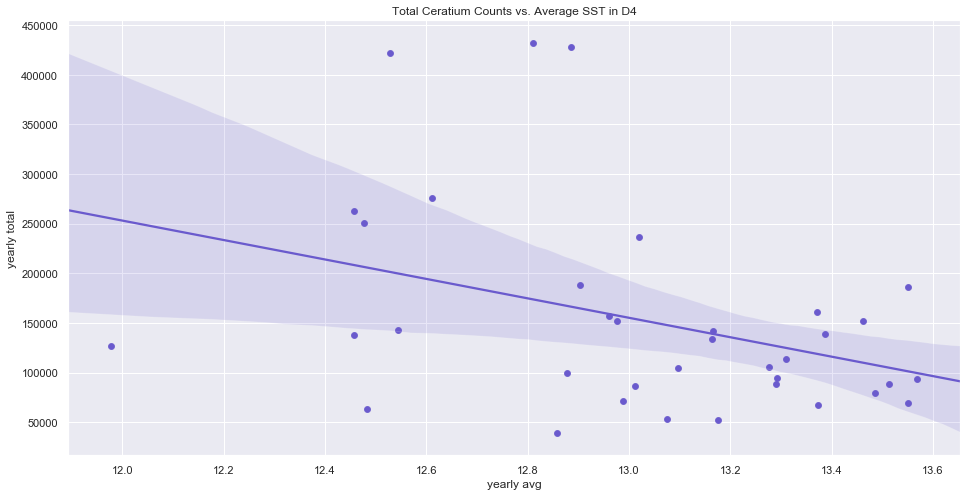

In [35]:
total_cerD4_values = all_cervarTotal('D4',cer_fusus_coastal,cer_furca_coastal,
                                     cer_lineatum_coastal,cer_tripos_coastal)
scatter_temp('D4', total_cerD4_values, yearly_sst_avgD4, 'slateblue')
plt.title('Total Ceratium Counts vs. Average SST in D4')

**ABOVE:** Scatterplot with regression line of best fit and 95% confidence interval for yearly average temperature against the total population count for the combined ceranium species suggests a negative relationship between the variables. The correlation coefficient is -0.3724.

#### Scatterplots of all species combined for SST

correlation:  0.17096710739587107


Text(0.5,1,'Total Ceratium Counts vs. Average MLD in D4')

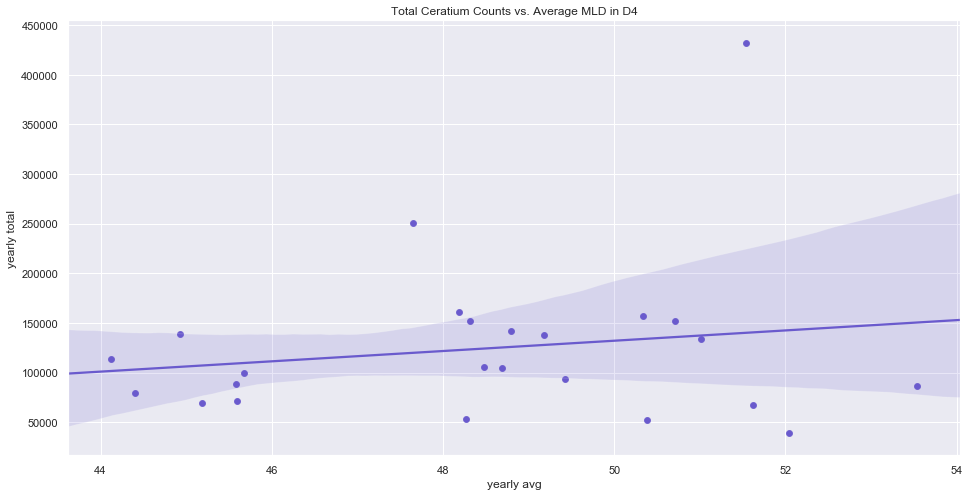

In [36]:
total_cerD4_values = all_cervarTotal('D4',cer_fusus_coastal,cer_furca_coastal, 
                                     cer_lineatum_coastal,cer_tripos_coastal)
scatter_temp('D4', total_cerD4_values, yearly_mld_avgD4, 'slateblue')
plt.title('Total Ceratium Counts vs. Average MLD in D4')

**ABOVE:** Scatterplot with regression line of best fit and 95% confidence interval for yearly average temperature against the total population count for the combined ceranium species suggests a weak, positive relationship between the variables. The correlation coefficient is 0.170967

## OLS Regression
> The models below run a linear regression on each ceratium species when compared to the yearly average sea surface temperature.

#### Ceratium Fusus

In [37]:
linear_model(cer_fusus_coastal, 'D4', yearly_sst_avgD4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yearly total   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     5.098
Date:                Wed, 12 Jun 2019   Prob (F-statistic):             0.0305
Time:                        09:12:29   Log-Likelihood:                -444.45
No. Observations:                  36   AIC:                             892.9
Df Residuals:                      34   BIC:                             896.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.856e+05   3.23e+05      2.433      0.020    1.29e+05    1.44e+06
yearly avg -5.594e+04   2.48e+04     -2.258      0.030   -1.06e+05   -5588.714
==============================================================================
Omnibus:                       24.527   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.979
Skew:                           1.859   Prob(JB):                     3.43e-09
Kurtosis:                       6.487   Cond. No.                         443.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Ceratium Furca

In [38]:
linear_model(cer_furca_coastal, 'D4', yearly_sst_avgD4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yearly total   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     2.095
Date:                Wed, 12 Jun 2019   Prob (F-statistic):              0.157
Time:                        09:12:29   Log-Likelihood:                -403.95
No. Observations:                  36   AIC:                             811.9
Df Residuals:                      34   BIC:                             815.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.756e+05   1.05e+05      1.675      0.103   -3.74e+04    3.89e+05
yearly avg -1.164e+04   8044.800     -1.447      0.157    -2.8e+04    4705.293
==============================================================================
Omnibus:                        7.495   Durbin-Watson:                   1.549
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                6.621
Skew:                           1.039   Prob(JB):                       0.0365
Kurtosis:                       3.308   Cond. No.                         443.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Ceratium Lineatum

In [39]:
linear_model(cer_lineatum_coastal, 'D4', yearly_sst_avgD4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yearly total   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.823
Date:                Wed, 12 Jun 2019   Prob (F-statistic):              0.186
Time:                        09:12:29   Log-Likelihood:                -408.35
No. Observations:                  36   AIC:                             820.7
Df Residuals:                      34   BIC:                             823.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.814e+05   1.18e+05      1.531      0.135   -5.94e+04    4.22e+05
yearly avg -1.227e+04   9090.361     -1.350      0.186   -3.07e+04    6199.356
==============================================================================
Omnibus:                       50.434   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.631
Skew:                           3.094   Prob(JB):                     5.74e-63
Kurtosis:                      15.361   Cond. No.                         443.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Ceratium Tripos

In [40]:
linear_model(cer_tripos_coastal, 'D4', yearly_sst_avgD4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yearly total   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     2.218
Date:                Wed, 12 Jun 2019   Prob (F-statistic):              0.146
Time:                        09:12:29   Log-Likelihood:                -418.74
No. Observations:                  36   AIC:                             841.5
Df Residuals:                      34   BIC:                             844.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.856e+05   1.58e+05      1.807      0.080   -3.57e+04    6.07e+05
yearly avg -1.807e+04   1.21e+04     -1.489      0.146   -4.27e+04    6586.207
==============================================================================
Omnibus:                       19.611   Durbin-Watson:                   1.500
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.287
Skew:                           1.484   Prob(JB):                     7.20e-07
Kurtosis:                       6.171   Cond. No.                         443.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**OVERALL:** Using 95% confidence, the only OLS linear model with a significant p-value is the model for the ceratium fusus species (0.03). The other species p-values were too high to yield any significant results. In the future, using multivariable regression to determine combined impact of MLD and SST would be more informative.

#### MLD Linear Models

In [61]:
linear_model(cer_fusus_coastal, 'D4', yearly_mld_avgD4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yearly total   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.113
Date:                Wed, 12 Jun 2019   Prob (F-statistic):              0.303
Time:                        09:16:02   Log-Likelihood:                -284.23
No. Observations:                  24   AIC:                             572.5
Df Residuals:                      22   BIC:                             574.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.022e+05   1.34e+05     -0.762      0.454    -3.8e+05    1.76e+05
yearly avg  2915.5452   2763.226      1.055      0.303   -2815.034    8646.125
==============================================================================
Omnibus:                       17.904   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.574
Skew:                           1.684   Prob(JB):                     3.41e-05
Kurtosis:                       6.039   Cond. No.                         908.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
linear_model(cer_furca_coastal, 'D4', yearly_mld_avgD4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yearly total   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.7494
Date:                Wed, 12 Jun 2019   Prob (F-statistic):              0.396
Time:                        09:16:06   Log-Likelihood:                -262.93
No. Observations:                  24   AIC:                             529.9
Df Residuals:                      22   BIC:                             532.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.698e+04   5.52e+04     -0.489      0.630   -1.41e+05    8.75e+04
yearly avg   984.4728   1137.248      0.866      0.396   -1374.036    3342.982
==============================================================================
Omnibus:                        8.761   Durbin-Watson:                   1.440
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                6.604
Skew:                           1.156   Prob(JB):                       0.0368
Kurtosis:                       4.120   Cond. No.                         908.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
linear_model(cer_lineatum_coastal, 'D4', yearly_mld_avgD4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yearly total   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.323
Date:                Wed, 12 Jun 2019   Prob (F-statistic):              0.262
Time:                        09:16:15   Log-Likelihood:                -274.24
No. Observations:                  24   AIC:                             552.5
Df Residuals:                      22   BIC:                             554.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.165e+04   8.85e+04     -0.923      0.366   -2.65e+05    1.02e+05
yearly avg  2095.4196   1821.655      1.150      0.262   -1682.461    5873.300
==============================================================================
Omnibus:                       44.340   Durbin-Watson:                   2.186
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.152
Skew:                           3.270   Prob(JB):                     2.79e-40
Kurtosis:                      14.805   Cond. No.                         908.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
linear_model(cer_tripos_coastal, 'D4', yearly_mld_avgD4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yearly total   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                    0.1385
Date:                Wed, 12 Jun 2019   Prob (F-statistic):              0.713
Time:                        09:16:22   Log-Likelihood:                -278.45
No. Observations:                  24   AIC:                             560.9
Df Residuals:                      22   BIC:                             563.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.349e+04   1.05e+05      0.792      0.437   -1.35e+05    3.02e+05
yearly avg  -808.3401   2171.751     -0.372      0.713   -5312.277    3695.596
==============================================================================
Omnibus:                       24.023   Durbin-Watson:                   1.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.458
Skew:                           1.986   Prob(JB):                     4.46e-09
Kurtosis:                       7.762   Cond. No.                         908.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using 95% confidence, none of the MLD linear models has a high enough p-value to determine significance.

### Deep Ocean Analysis (Area E5)

Text(0,0.5,'Standard Deviation (ºC)')

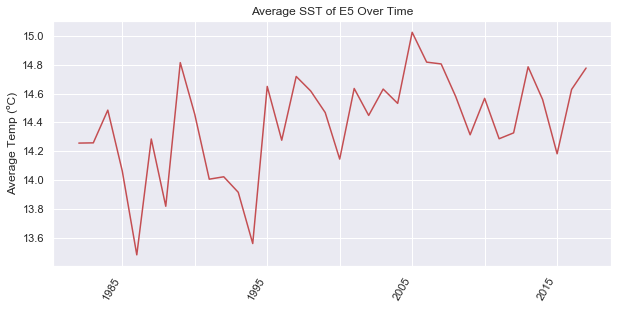

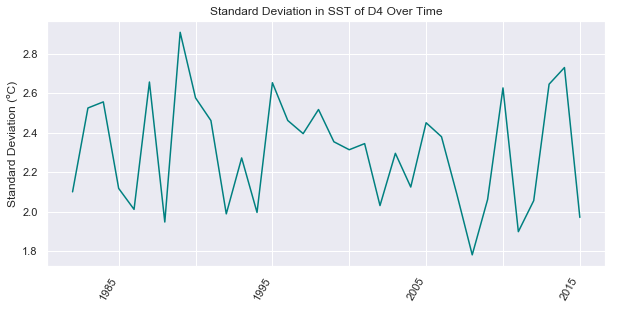

In [41]:
# SST Time Series
yearly_sst_avgE5 = yearly_avg_df(SST_E5)
plot_yearly_choice(yearly_sst_avgE5,'yearly avg','r')
plt.title('Average SST of E5 Over Time')
plt.ylabel('Average Temp (ºC)')

yearly_sst_stdE5=yearly_std_df(SST_E5,"temp")
plot_yearly_choice(yearly_sst_stdE5,'yearly std','teal')
plt.title('Standard Deviation in SST of D4 Over Time')
plt.ylabel('Standard Deviation (ºC)')

**ABOVE:** Yearly average SST time series and yearly standard deviation SST for area E5.

Text(0,0.5,'Standard Deviation (m)')

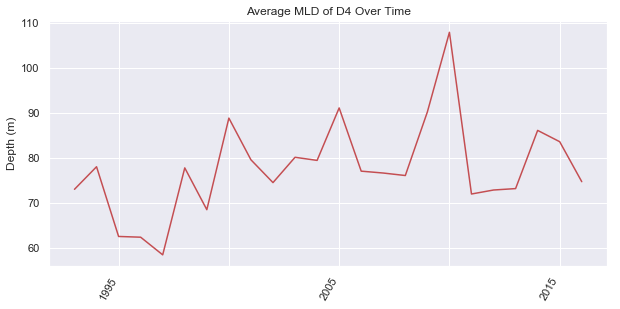

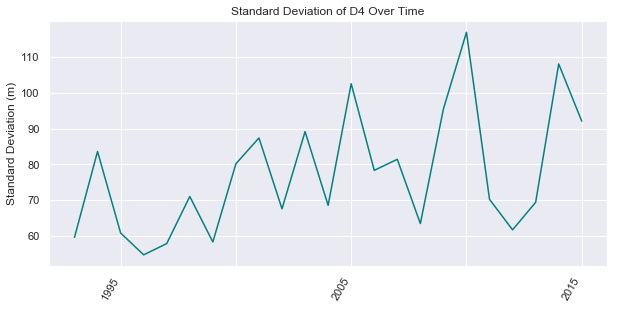

In [42]:
# MLD Time Series
yearly_mld_avgE5 = yearly_avg_df(MLD_E5)
plot_yearly_choice(yearly_mld_avgE5,'yearly avg','r')
plt.title('Average MLD of D4 Over Time')
plt.ylabel('Depth (m)')

yearly_mld_stdE5=yearly_std_df(MLD_E5,"mld")
plot_yearly_choice(yearly_mld_stdE5,'yearly std','teal')
plt.title('Standard Deviation of D4 Over Time')
plt.ylabel('Standard Deviation (m)')

**ABOVE:** Yearly average MLD and MLD standard deviation for area E5.

Text(0.5,1,'Time Series of Average Temperature (ºC) and Ceratium Species Populations in E5')

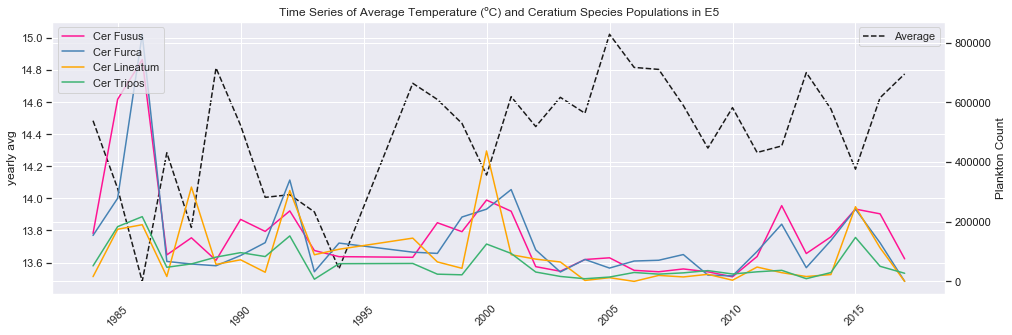

In [43]:
certemp_plotavg('E5',yearly_sst_avgE5,cer_fusus_deep_ocean,cer_furca_deep_ocean,
                cer_lineatum_deep_ocean,cer_tripos_deep_ocean)
plt.title('Time Series of Average Temperature (ºC) and Ceratium Species Populations in E5')

**ABOVE:** Time series for yearly total planton counts and yearly average SST.

Text(0.5,1,'Time Series of STD in Temperature (ºC) and Ceratium Species Populations in E5')

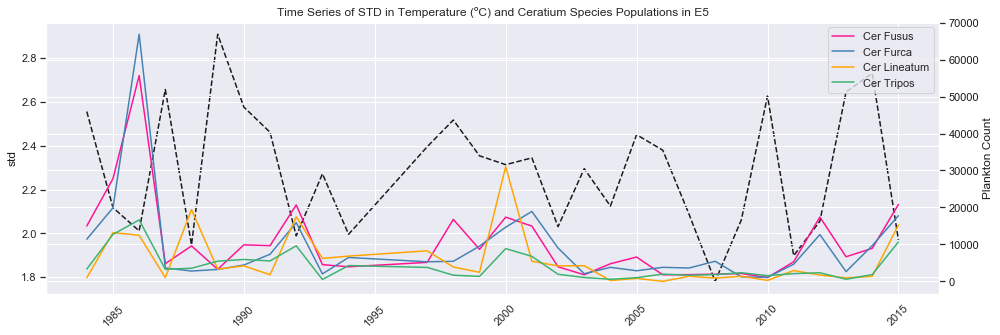

In [44]:
certemp_plotstd('E5',yearly_sst_stdE5,cer_fusus_deep_ocean,cer_furca_deep_ocean,
                cer_lineatum_deep_ocean,cer_tripos_deep_ocean)
plt.title('Time Series of STD in Temperature (ºC) and Ceratium Species Populations in E5')

**ABOVE:** Time series for yearly SST standard deviation and plankton population standard deviation.

Text(0.5,1,'Time Series of Yearly Average MLD (m) and Ceratium Species Populations in E5')

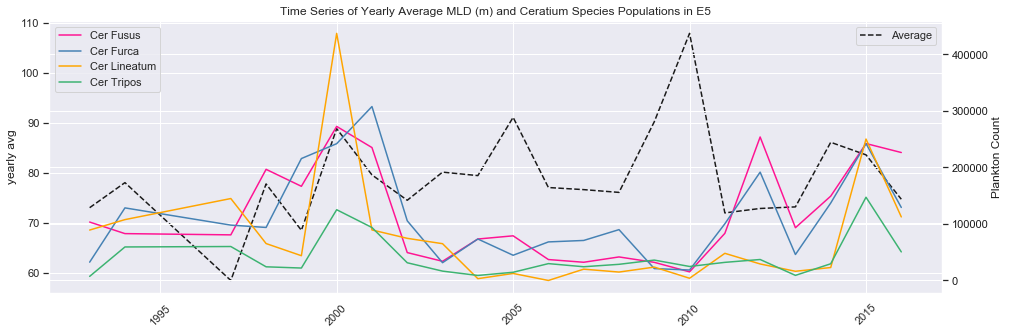

In [45]:
certemp_plotavg('E5',yearly_mld_avgE5,cer_fusus_deep_ocean,cer_furca_deep_ocean,
                cer_lineatum_deep_ocean,cer_tripos_deep_ocean)
plt.title('Time Series of Yearly Average MLD (m) and Ceratium Species Populations in E5')

**ABOVE:** Time series of average MLD against total plankton counts. 


Text(0.5,1,'Time Series of STD in MLD and Ceratium Species Populations in E5')

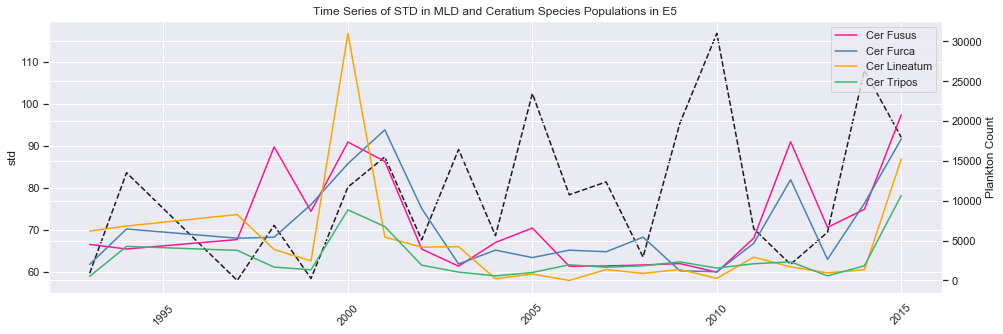

In [46]:
certemp_plotstd('E5',yearly_mld_stdE5,cer_fusus_deep_ocean,cer_furca_deep_ocean,
                cer_lineatum_deep_ocean,cer_tripos_deep_ocean)
plt.title('Time Series of STD in MLD and Ceratium Species Populations in E5')

**ABOVE:** Time series of yearly standard deviation of MLD against yearly standard deviation of plankton.

#### Scatterplots

cer fusus deep_ocean  correlation coeff: -0.5341163825670191
cer furca deep_ocean  correlation coeff: -0.5432133508800536
cer lineatum deep_ocean  correlation coeff: -0.539899788276598
cer tripos deep_ocean  correlation coeff: -0.5635630540323682


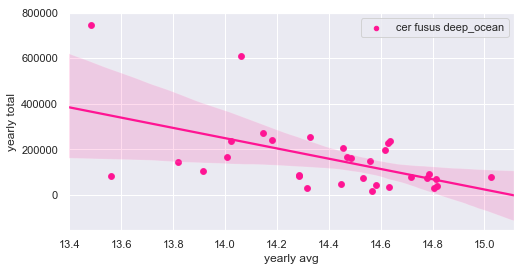

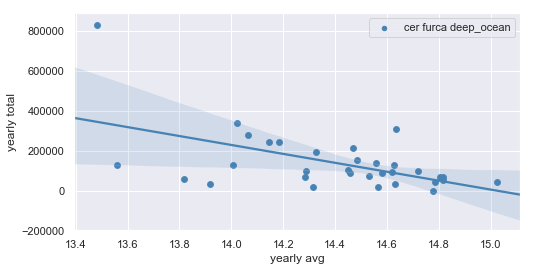

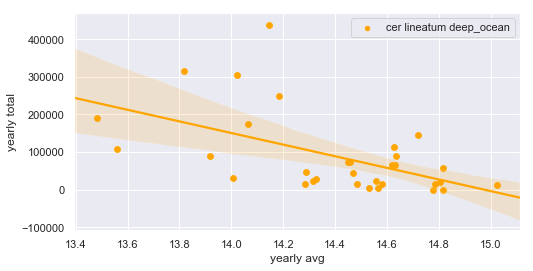

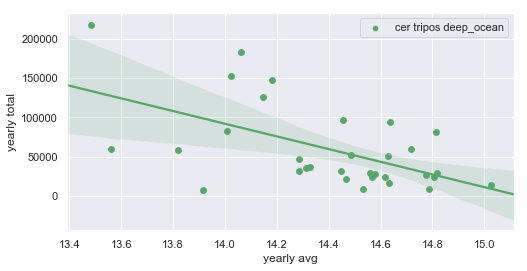

In [47]:
# Plot yearly avg. SST vs. yearly ceratium species avg
scatter_avg(cer_fusus_deep_ocean,'cer fusus deep_ocean', yearly_sst_avgE5, 'E5', 'deeppink')
scatter_avg(cer_furca_deep_ocean,'cer furca deep_ocean',yearly_sst_avgE5,'E5','steelblue' )
scatter_avg(cer_lineatum_deep_ocean,'cer lineatum deep_ocean',yearly_sst_avgE5,'E5','orange' )
scatter_avg(cer_tripos_deep_ocean,'cer tripos deep_ocean',yearly_sst_avgE5,'E5','g' )

**ABOVE:** Scatterplots of yearly average SST against total plankton population counts.

cer fusus deep_ocean  correlation coeff: -0.215296266985699
cer furca deep_ocean  correlation coeff: -0.26147877115884893
cer lineatum deep_ocean  correlation coeff: -0.32109580473652405
cer tripos deep_ocean  correlation coeff: -0.22221612266515067


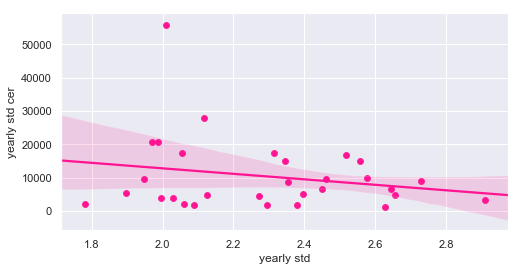

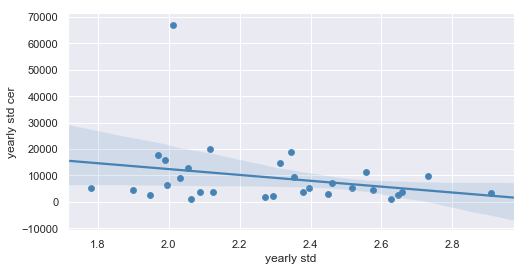

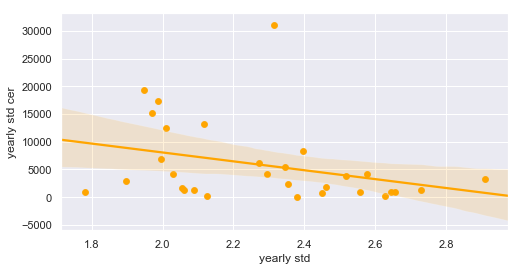

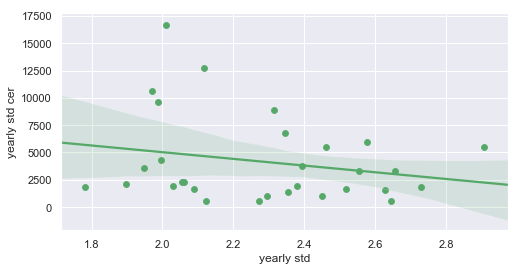

In [48]:
# Plot yearly std. SST vs. yearly ceratium species std
scatter_std(cer_fusus_deep_ocean,'cer fusus deep_ocean', yearly_sst_stdE5, 'E5', 'deeppink')
scatter_std(cer_furca_deep_ocean,'cer furca deep_ocean',yearly_sst_stdE5,'E5','steelblue' )
scatter_std(cer_lineatum_deep_ocean,'cer lineatum deep_ocean',yearly_sst_stdE5,'E5','orange' )
scatter_std(cer_tripos_deep_ocean,'cer tripos deep_ocean',yearly_sst_stdE5,'E5','g' )

**ABOVE:** Scatterplots of yearly SST/MLD standard deviation against plankton population standard deviation.

cer fusus deep_ocean  correlation coeff: -0.10749334735836118
cer furca deep_ocean  correlation coeff: -0.15803729171561084
cer lineatum deep_ocean  correlation coeff: 0.0226438304841769
cer tripos deep_ocean  correlation coeff: 0.10100333810938315


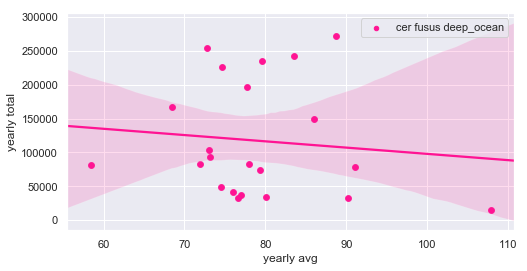

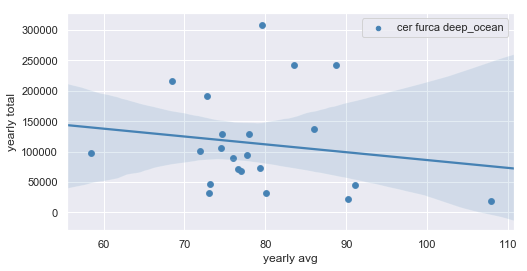

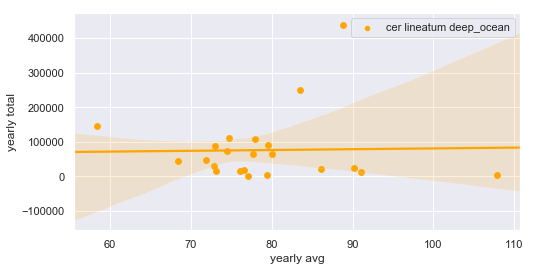

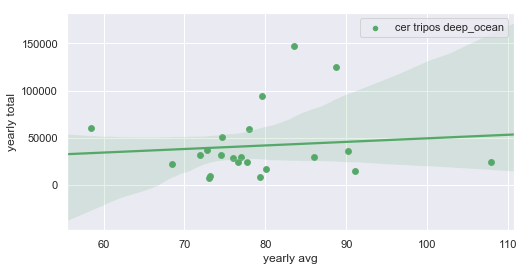

In [49]:
# Plot yearly avg. MLD vs. yearly total ceratium species count
scatter_avg(cer_fusus_deep_ocean,'cer fusus deep_ocean',yearly_mld_avgE5,'E5','deeppink' )
scatter_avg(cer_furca_deep_ocean,'cer furca deep_ocean',yearly_mld_avgE5,'E5','steelblue' )
scatter_avg(cer_lineatum_deep_ocean,'cer lineatum deep_ocean',yearly_mld_avgE5,'E5','orange' )
scatter_avg(cer_tripos_deep_ocean,'cer tripos deep_ocean',yearly_mld_avgE5,'E5','g' )

**ABOVE:** Scatterplot of yearly average MLD against total plankton population counts.

#### Scatter Plot of All Ceratium Species vs Average SST

correlation:  -0.6193014578310462


Text(0.5,1,'Ceratium Species Population Totals vs Average SST')

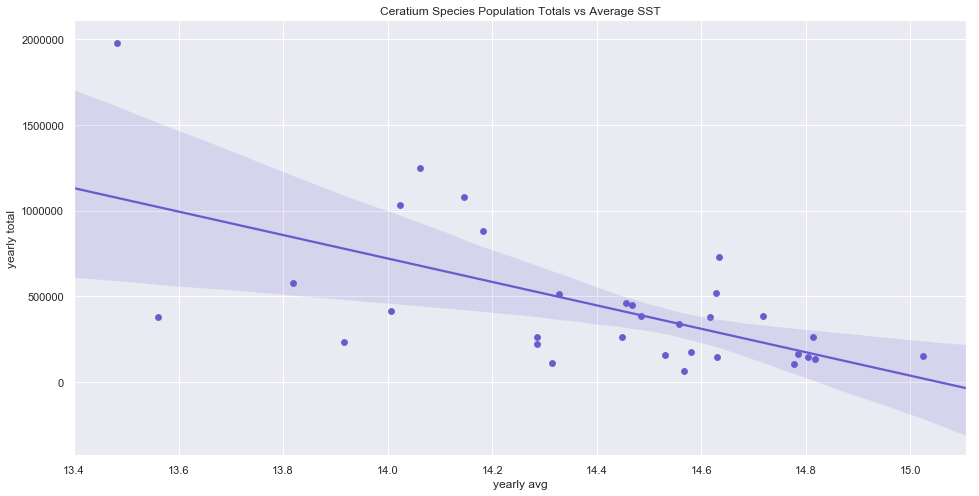

In [50]:
total_cerE5_values = all_cervarTotal('E5',cer_fusus_deep_ocean,cer_furca_deep_ocean
                                     ,cer_lineatum_deep_ocean,cer_tripos_deep_ocean)
scatter_temp('E5', total_cerE5_values, yearly_sst_avgE5, 'slateblue')
plt.title("Ceratium Species Population Totals vs Average SST")

**ABOVE:** Again, we see a moderately strong negative correlation with correlation coefficient -0.5948. Suggesting a negative relationship between SST and ceratium populsations.

#### Scatter Plot of All Ceratium Species vs Average MLD

correlation:  -0.060071820319851935


Text(0.5,1,'Ceratium Species Populations vs Average MLD')

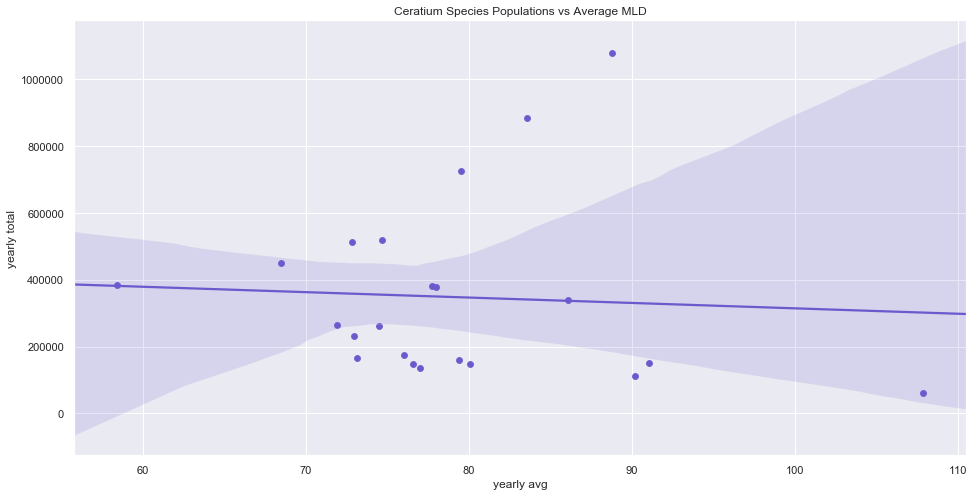

In [51]:
total_cerE5_values = all_cervarTotal('E5',cer_fusus_deep_ocean,cer_furca_deep_ocean,
                                     cer_lineatum_deep_ocean,cer_tripos_deep_ocean)
scatter_temp('E5', total_cerE5_values, yearly_mld_avgE5, 'slateblue')
plt.title("Ceratium Species Populations vs Average MLD")

**ABOVE:** There is a very weak correlation here of -0.0601, but there are very few data points so it's unlikely this graph is telling us anything useful.

### OLS Linear Models

> The models below run a linear regression on each ceratium species when compared to the yearly average sea surface temperature. 

#### Ceratium Fusus

In [52]:
linear_model(cer_fusus_deep_ocean, 'E5', yearly_sst_avgE5)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yearly total   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     11.97
Date:                Wed, 12 Jun 2019   Prob (F-statistic):            0.00164
Time:                        09:12:45   Log-Likelihood:                -422.33
No. Observations:                  32   AIC:                             848.7
Df Residuals:                      30   BIC:                             851.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.398e+06   9.36e+05      3.629      0.001    1.49e+06    5.31e+06
yearly avg -2.249e+05    6.5e+04     -3.460      0.002   -3.58e+05   -9.22e+04
==============================================================================
Omnibus:                       12.255   Durbin-Watson:                   1.217
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.810
Skew:                           1.101   Prob(JB):                      0.00165
Kurtosis:                       5.180   Cond. No.                         569.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Ceratium Furca

In [53]:
linear_model(cer_furca_deep_ocean, 'E5', yearly_sst_avgE5)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yearly total   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     12.56
Date:                Wed, 12 Jun 2019   Prob (F-statistic):            0.00131
Time:                        09:12:46   Log-Likelihood:                -421.35
No. Observations:                  32   AIC:                             846.7
Df Residuals:                      30   BIC:                             849.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.357e+06   9.08e+05      3.697      0.001     1.5e+06    5.21e+06
yearly avg -2.234e+05    6.3e+04     -3.544      0.001   -3.52e+05   -9.47e+04
==============================================================================
Omnibus:                       21.364   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.455
Skew:                           1.446   Prob(JB):                     9.96e-10
Kurtosis:                       7.767   Cond. No.                         569.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Ceratium Lineatum

In [54]:
linear_model(cer_lineatum_deep_ocean, 'E5', yearly_sst_avgE5)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yearly total   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     12.34
Date:                Wed, 12 Jun 2019   Prob (F-statistic):            0.00143
Time:                        09:12:46   Log-Likelihood:                -409.81
No. Observations:                  32   AIC:                             823.6
Df Residuals:                      30   BIC:                             826.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.312e+06   6.33e+05      3.653      0.001    1.02e+06    3.61e+06
yearly avg -1.544e+05   4.39e+04     -3.513      0.001   -2.44e+05   -6.46e+04
==============================================================================
Omnibus:                       17.843   Durbin-Watson:                   2.176
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.184
Skew:                           1.519   Prob(JB):                     1.52e-05
Kurtosis:                       5.722   Cond. No.                         569.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Ceratium Tripos vs. SST

In [55]:
linear_model(cer_tripos_deep_ocean, 'E5', yearly_sst_avgE5)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yearly total   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     13.96
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           0.000783
Time:                        09:12:46   Log-Likelihood:                -387.03
No. Observations:                  32   AIC:                             778.1
Df Residuals:                      30   BIC:                             781.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.22e+06   3.11e+05      3.928      0.000    5.86e+05    1.85e+06
yearly avg  -8.06e+04   2.16e+04     -3.737      0.001   -1.25e+05   -3.65e+04
==============================================================================
Omnibus:                        1.269   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                1.093
Skew:                           0.429   Prob(JB):                        0.579
Kurtosis:                       2.711   Cond. No.                         569.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**OVERALL:** With 95% confidence, all the p-values above are significant, which would imply that there is a negative relationship between SST and total ceratium species populations.

### MLD Linear Models

#### Ceratium Fusus vs. MLD

In [69]:
linear_model(cer_fusus_deep_ocean, 'E5', yearly_mld_avgE5)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yearly total   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.2338
Date:                Wed, 12 Jun 2019   Prob (F-statistic):              0.634
Time:                        09:19:29   Log-Likelihood:                -280.19
No. Observations:                  22   AIC:                             564.4
Df Residuals:                      20   BIC:                             566.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.905e+05   1.53e+05      1.249      0.226   -1.28e+05    5.09e+05
yearly avg  -926.3849   1915.893     -0.484      0.634   -4922.867    3070.097
==============================================================================
Omnibus:                        4.146   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.126   Jarque-Bera (JB):                2.721
Skew:                           0.683   Prob(JB):                        0.257
Kurtosis:                       1.949   Cond. No.                         661.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Ceratium Furca vs. MLD

In [70]:
linear_model(cer_furca_deep_ocean, 'E5', yearly_mld_avgE5)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yearly total   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.5123
Date:                Wed, 12 Jun 2019   Prob (F-statistic):              0.482
Time:                        09:19:37   Log-Likelihood:                -278.90
No. Observations:                  22   AIC:                             561.8
Df Residuals:                      20   BIC:                             564.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.153e+05   1.44e+05      1.497      0.150   -8.47e+04    5.15e+05
yearly avg -1292.6679   1806.010     -0.716      0.482   -5059.938    2474.602
==============================================================================
Omnibus:                        5.679   Durbin-Watson:                   1.162
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                4.271
Skew:                           1.077   Prob(JB):                        0.118
Kurtosis:                       3.128   Cond. No.                         661.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Ceratium Lineatum vs. MLD

In [71]:
linear_model(cer_lineatum_deep_ocean, 'E5', yearly_mld_avgE5)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yearly total   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.049
Method:                 Least Squares   F-statistic:                   0.01026
Date:                Wed, 12 Jun 2019   Prob (F-statistic):              0.920
Time:                        09:19:43   Log-Likelihood:                -283.93
No. Observations:                  22   AIC:                             571.9
Df Residuals:                      20   BIC:                             574.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.794e+04   1.81e+05      0.321      0.752   -3.19e+05    4.35e+05
yearly avg   229.9389   2270.054      0.101      0.920   -4505.311    4965.189
==============================================================================
Omnibus:                       29.085   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.764
Skew:                           2.421   Prob(JB):                     2.12e-12
Kurtosis:                       8.934   Cond. No.                         661.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Ceratium Tripos vs. MLD

In [72]:
linear_model(cer_tripos_deep_ocean, 'E5', yearly_mld_avgE5)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yearly total   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                    0.2061
Date:                Wed, 12 Jun 2019   Prob (F-statistic):              0.655
Time:                        09:19:54   Log-Likelihood:                -261.81
No. Observations:                  22   AIC:                             527.6
Df Residuals:                      20   BIC:                             529.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.164e+04   6.61e+04      0.176      0.862   -1.26e+05     1.5e+05
yearly avg   377.2331    830.869      0.454      0.655   -1355.929    2110.395
==============================================================================
Omnibus:                       14.186   Durbin-Watson:                   1.554
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.823
Skew:                           1.630   Prob(JB):                      0.00164
Kurtosis:                       4.835   Cond. No.                         661.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using 95% confidence, we can not determine any significant correlation between MLD and algae populations given these linear models. All p-values are well above .05.

## Results

#### Coastal

P-Value for Ceratium Fusus versus average average SST for Area D4: **0.030** <br>
P-Value for Ceratium Furca versus average SST for Area D4: **0.157** <br>
P-Value for Ceratium Lineatum versus average SST for Area D4: **0.186** <br>
P-Value for Ceratium Tripos versus average SST for Area D4: **0.146** <br>

P-Value for Ceratium Fusus versus average MLD for Area D4: **0.303** <br>
P-Value for Ceratium Furca versus average MLD for Area D4: **0.396** <br>
P-Value for Ceratium Lineatum versus average MLD for Area D4: **0.262** <br>
P-Value for Ceratium Tripos versus average MLD for Area D4: **0.713** <br>

P-Value for Ceratium Fusus versus average SST for Area C2: **0.003** <br>
P-Value for Ceratium Furca versus average SST for Area C2: **0.002** <br>
P-Value for Ceratium Lineatum versus average SST for Area C2: **0.050** <br>
P-Value for Ceratium Tripos versus average SST for Area C2: **0.013** <br>

P-Value for Ceratium Fusus versus average MLD for Area C2: **0.265** <br>
P-Value for Ceratium Furca versus average MLD for Area C2: **0.584** <br>
P-Value for Ceratium Lineatum versus average MLD for Area C2: **0.204** <br>
P-Value for Ceratium Tripos versus average MLD for Area C2: **0.572** <br>

P-Value for Ceratium Fusus versus average SST for Area C1: **0.000** <br>
P-Value for Ceratium Furca versus average SST for Area C1: **0.138** <br>
P-Value for Ceratium Lineatum versus average SST for Area C1: **0.253** <br>
P-Value for Ceratium Tripos versus average SST for Area C1: **0.795** <br>

P-Value for Ceratium Fusus versus average MLD for Area C1: **0.885** <br>
P-Value for Ceratium Furca versus average MLD for Area C1: **0.467** <br>
P-Value for Ceratium Lineatum versus average MLD for Area C1: **0.053** <br>
P-Value for Ceratium Tripos versus average MLD for Area C1: **0.352** <br>

#### Deep Ocean

P-Value for Ceratium Fusus versus average SST for Area E5: **0.002** <br>
P-Value for Ceratium Furca versus average SST for Area E5: **0.001** <br>
P-Value for Ceratium Lineatum versus average SST for Area E5: **0.001** <br>
P-Value for Ceratium Tripos versus average SST for Area E5: **0.001** <br>

P-Value for Ceratium Fusus versus average SST for Area E5: **0.634** <br>
P-Value for Ceratium Furca versus average SST for Area E5: **0.482** <br>
P-Value for Ceratium Lineatum versus average SST for Area E5: **0.920** <br>
P-Value for Ceratium Tripos versus average SST for Area E5: **0.655** <br>

P-Value for Ceratium Fusus versus average SST for Area E6: **0.327** <br>
P-Value for Ceratium Furca versus average SST for Area E6: **0.177** <br> 
P-Value for Ceratium Lineatum versus average SST for Area E6: **0.881** <br>
P-Value for Ceratium Tripos versus average SST for Area E6: **0.048** <br>

P-Value for Ceratium Fusus versus average MLD for Area E6: **0.343** <br>
P-Value for Ceratium Furca versus average MLD for Area E6: **0.859** <br> 
P-Value for Ceratium Lineatum versus average MLD for Area E6: **0.727** <br>
P-Value for Ceratium Tripos versus average MLD for Area E6: **0.220** <br>

P-Value for Ceratium Fusus versus average SST for Area D7: **0.290** <br>
P-Value for Ceratium Furca versus average SST for Area D7: **0.238** <br>
P-Value for Ceratium Lineatum versus average SST for Area D7: **0.349** <br>
P-Value for Ceratium Tripos versus average SST for Area D7: **0.938** <br>

P-Value for Ceratium Fusus versus average MLD for Area D7: **0.723** <br>
P-Value for Ceratium Furca versus average MLD for Area D7: **0.745** <br>
P-Value for Ceratium Lineatum versus average MLD for Area D7: **0.947** <br>
P-Value for Ceratium Tripos versus average MLD for Area D7: **0.642** <br>


The only p-values that proved significant were those of ceratium fusus vs. average SST for Area D4; ceratium fusus, furca, and lineatum vs. average SST for Area C2; ceratium fusus versus average SST for Area C1; and all ceratium species versus average SST for Area E5. Surprisingly, the coefficient for yearly average SST  was negative for all these models.

The correlation coefficients and regression coefficients for MLD were negative in the majority of the scatterplots and linear models. None of the p-values obtained were small enough to be significant when working with 95% confidence, though, so we cannot form any conclusions from these figures.


## Ethics and Privacy

All data will be acquired through the United States federal government or federally-funded organizations, all of which is free for public use with the proper requests. Regarding privacy of data, we have official written permission from two different project leaders for the two datasets we are using. For the purposes of this project, we will not be using any other data than these two datasets.

Potential biases in these data are associated with sample collection, which has been conducted monthly over large geographic areas. Continuous Plankton Recorder (CPR) sampling is restricted on commercial shipping routes, which means that large areas of the North Atlantic are not sampled. Additionally, the same CPR devices are usually used for the same route each month because of logistical considerations, rather than being randomly assigned to a route every time. This maintains consistent sampling for each route, but may lead to systematic biases if each CPR device has slightly different sampling characteristics (Richardson et al., 2005).

The constantly evolving additions and cessations of routes have led to an expansion and contraction of the sampling over the history of the survey. These changes in the coverage of the survey through time can lead to additional biases. For example, a region sampled as part of several different CPR routes may show a shift over time in the mean sampling position if some routes have been introduced or discontinued. 

Averaging over large areas also introduces spatial biases due to the changing positions of tow routes, possibly leading to non-representative estimates; however, it does also reduce the error associated with the category counting system. In practice, reasonably large regions (about the size of CPR standard areas) should be considered, but smaller regions are possible in well-sampled areas (Richardson et al., 2005).

We will address these biases by paying attention to where each sample is coming from and whether or not they exist on a commonly traveled route or near a restricted shipping route. In our analysis, we will keep in mind the possibility that certain areas may be underrepresented in their plankton counts, and therefore may not create a complete picture. However, overall, there is strong evidence that the CPR device and sampling procedures capture a roughly consistent fraction of each taxon and thus reflects real inter-annual and seasonal patterns. 

Some people that could make money from our analysis are those conducting more robust research and selling their findings to industry companies that can profit from our findings. Unintended consequences may come if important information or findings are withheld. For example, due to toxins produced by harmful algae blooms, shellfish can become contaminated; if we were to by some chance find a correlation that leads to a potential prediction model, this is important information to share. We will guard against information withholding by publishing our final analysis online through GitHub. 

Regarding concept drift, we will be deleting our existing data at the end of this project cycle, so if there were further analysis to be done, we would refresh our dataset by getting in touch with the owners and revising our analysis with the more current data. To prevent unintended use, we are staying in touch with the dataset owners and sending our final project to them as a “quality check.” Additionally, we will be publishing our final analysis and select data points and visualizations rather than the entire dataset to prevent any outside, unregulated use.

## Conclusion and Discussion

The majority of our results for the relationship between SST and the populations of the ceratium genus are in direct conflict with existing beliefs. Though our correlation coefficients for MLD seemed to agree with our hypothesis, our p-values were too high so we would not be confident saying we have proved or disproved anything.

This however, does not mean there is no room for further exploration of the topic. With weak p-values, these results suggest there are many more variables at play here, possibly a confounding variable or a combination of factors that contribute, rather than just sea surface temperature or mixed layer depth. Algal growth is a complicated issue and is influenced by many other factors that we did not account for due to the availability of suitable datasets – this opens doors for future investigations to establish specific causation. Overall, we would hope to investigate these relationships further in the future.

A key limitation of this analysis was running single-variable analysis. In the future, we would hope to take other variables into account in our analysis, such as ocean acidity and salinity, as well as observe interactive effects between all of these variables. Another limitation was the geographic region of our dataset; different results may be found with plankton count data from other regions of the ocean. Our analysis focused on the Northern Atlantic Ocean, but water conditions in other places such as tropical Western Pacific or temperate Eastern Pacific may show different correlations than what we found. Even just within the Northern Atlantic Ocean data we used, it would be interesting to compare areas such as A8, found in the arctic climate, to area F8, which is closer to the equator. 

The unpredictability of algal blooms is something scientists have studied for years, and this analysis attempts to establish the grounds for further exploration of the underlying cause of this phenomenon. Though we ended with unexpected results, this analysis simply tells us to direct our attention elsewhere in searching to understand the mystery of red tides. 

## References

Richardson, A., Walne, A., John, A., Jonas, T., Lindley, J., Sims, D., . . . Witt, M. (n.d.). Using continuous plankton recorder data. Elsevier. Retrieved May 1, 2019, from http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.553.284&rep=rep1&type=pdf

https://www.britannica.com/science/algae

https://www.nature.com/news/climate-change-is-making-algal-blooms-worse-1.21884

https://www.noaa.gov/what-is-harmful-algal-bloom

https://www.britannica.com/science/red-tide

https://www.britannica.com/science/dinoflagellate

## Acknowledgements

Special thanks to David Johns of the CPR Survey and Todd O’Brien of NOAA Federal for providing data, support, and guidance to us throughout this project. 